In [1]:
import parsnip
import h5py
import lcdata
import astropy
from astropy.table import Table
from matplotlib import pyplot as plt
import numpy as np
import statistics
from astropy.io import ascii as asc

In [7]:
dataset_all = lcdata.read_hdf5('./dataset_554_lsst.h5')

In [85]:
dataset_all_wrs = dataset_all[:11]+dataset_all[12:339]+dataset_all[340:483]+dataset_all[484:]

In [8]:
dataset_all_wrs.meta

object_id,ra,dec,type,redshift,z_spec_exists,hostgal_photoz,hostgal_photoz_err
str23,float64,float64,str7,float64,int64,float32,float32
A202103221407558m001825,211.98278629,-0.30695087,Unknown,0.4217931032180786,0,0.4217931,0.08276691
A202103221408139m033502,212.05795218,-3.58394667,Unknown,0.7430001497268677,0,0.74300015,0.123186514
A202103221408412p002445,212.17173702,0.41252734,Unknown,0.30602824687957764,0,0.30602825,0.04898929
A202103221408578m005300,212.2412,-0.8833,Unknown,0.8038440942764282,0,0.8038441,0.08160352
A202103221409059m023156,212.27475706,-2.53247783,Unknown,0.5241751670837402,0,0.52417517,0.16277674
A202103221409405p003222,212.41911883,0.53946084,Unknown,0.44698280096054077,0,0.4469828,0.17842479
...,...,...,...,...,...,...,...
T202106021430509m023125,217.71235254,-2.52388313,Unknown,0.15156035125255585,0,0.15156035,0.047065422
T202106021434224p023158,218.59339421,2.53281567,Unknown,0.9559399485588074,0,0.95593995,0.22913234


In [7]:
print(type(dataset_all.light_curves))
type(dataset_all.meta)

<class 'numpy.ndarray'>


astropy.table.table.Table

In [9]:
model = parsnip.load_model('ps1')
model1 = parsnip.load_model('plasticc')

/Users/EmilieCote/opt/anaconda3/lib/python3.9/site-packages/parsnip/parsnip.py:289: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /Users/distiller/project/pytorch/torch/csrc/utils/tensor_new.cpp:210.)
  self.band_interpolate_weights = torch.FloatTensor(band_weights).to(self.device)


In [10]:
dataset_all_wrs_ps1 = dataset_all_wrs[:]

In [11]:
dataset_all_wrs == dataset_all_wrs_ps1

False

In [2]:
dataset_all_wrs.write_hdf5('./dataset_554_lsst.h5')

NameError: name 'dataset_all_wrs' is not defined

In [92]:
dataset_all_wrs_ps1.write_hdf5('./dataset_554_ps1.h5')

In [12]:
print(dataset_all_wrs_ps1.light_curves[0]['band'][1])

for i in range(0,len(dataset_all_wrs_ps1)):
    dataset_all_wrs_ps1.light_curves[i]['band'] = dataset_all_wrs_ps1.light_curves[i]['band'].astype(np.dtype('U6'))
    l_c = dataset_all_wrs_ps1.light_curves[i]
    for j in range(0,len(l_c)):
        band = l_c['band'][j]
        if 'r' in band:
            dataset_all_wrs_ps1.light_curves[i]['band'][j] = 'ps1::r'
        if 'g' in band:
            dataset_all_wrs_ps1.light_curves[i]['band'][j] = 'ps1::g'
        if 'z' in band:
            dataset_all_wrs_ps1.light_curves[i]['band'][j] = 'ps1::z'

print(dataset_all_wrs_ps1.light_curves[0]['band'])

lsstg
 band 
------
ps1::r
ps1::g
ps1::r
ps1::r
ps1::z
ps1::r
ps1::z
ps1::r
ps1::z
ps1::r
ps1::z
ps1::r


In [242]:
index = 0
for i, j in enumerate(dataset_all_wrs):
    try:
        index = i
        rs = j.meta['redshift']
        if rs==-99.0:
            print('no redshift', index)
    except KeyError:
        print(index)
        break




/var/folders/nr/rbr3ndbn343d7__44zxt3v780000gn/T/ipykernel_13988/3689385588.py:6: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if rs==-99.0:


KeyboardInterrupt: 

/Users/EmilieCote/opt/anaconda3/lib/python3.9/site-packages/parsnip/plotting.py:81: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  ax.errorbar(band_time, band_flux, band_fluxerr, fmt='o', c=c, label=band_name,
/Users/EmilieCote/opt/anaconda3/lib/python3.9/site-packages/parsnip/plotting.py:81: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  ax.errorbar(band_time, band_flux, band_fluxerr, fmt='o', c=c, label=band_name,
/Users/EmilieCote/opt/anaconda3/lib/python3.9/site-packages/parsnip/plotting.py:81: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  ax.errorbar(band_time, band_flux, band_fluxerr, fmt='o', c=c, label=band_name,
/Users/EmilieCote/opt/anacon

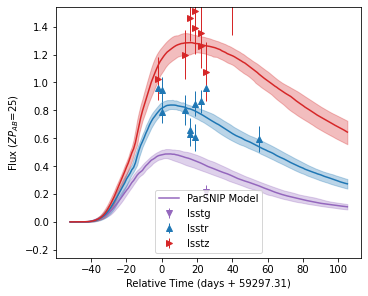

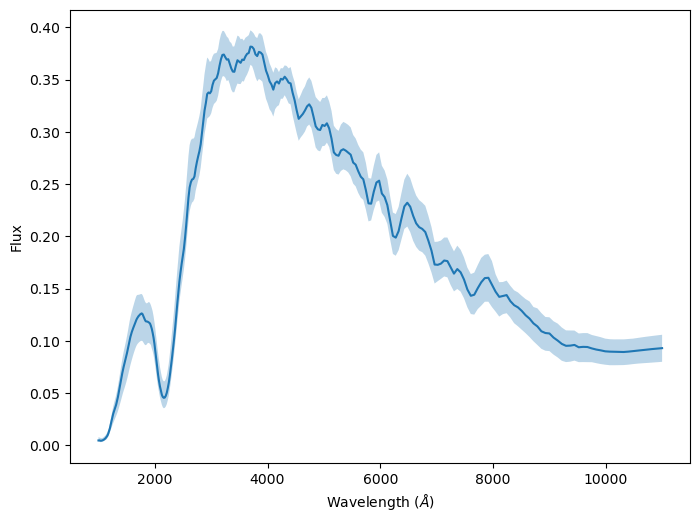

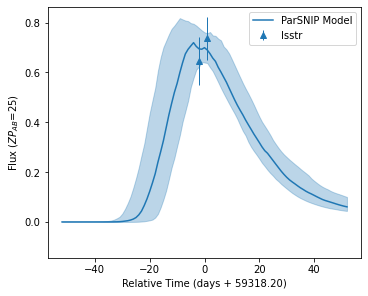

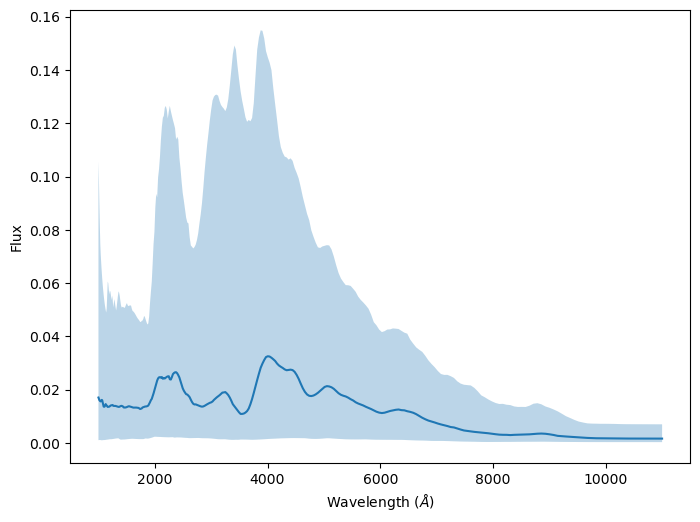

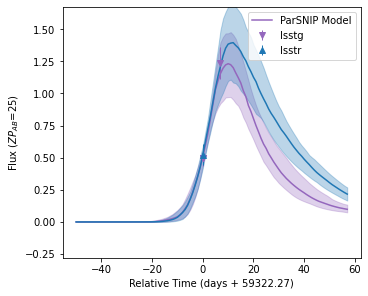

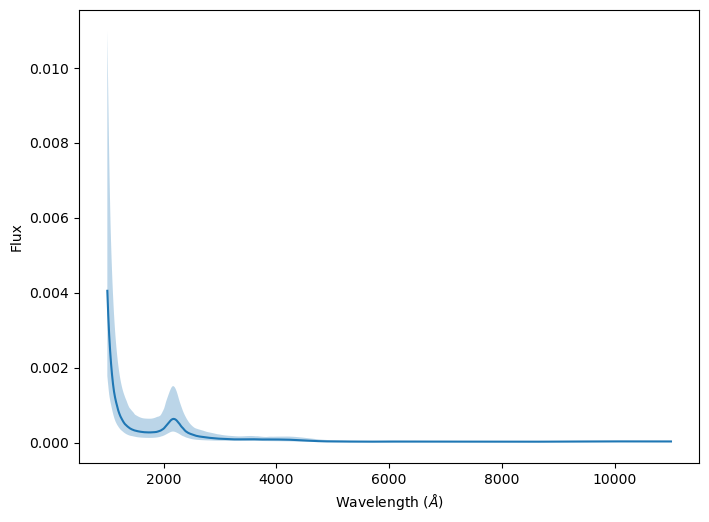

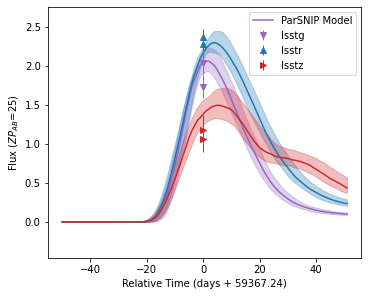

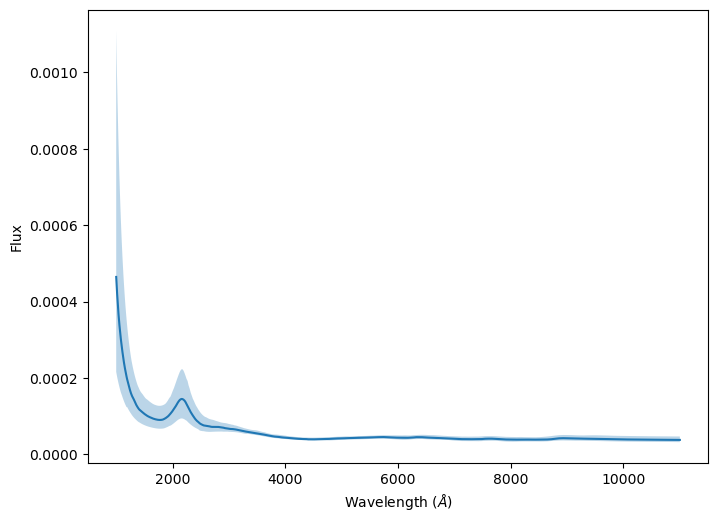

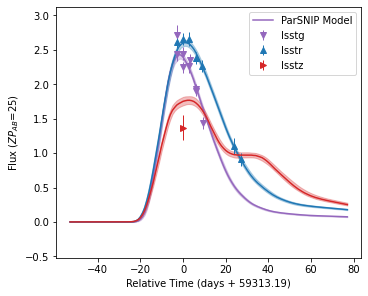

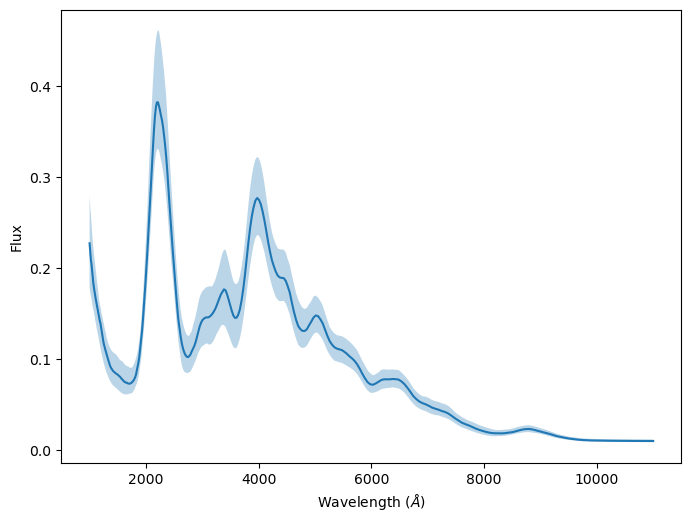

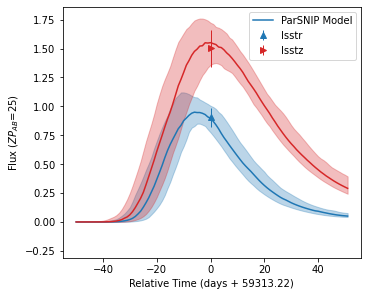

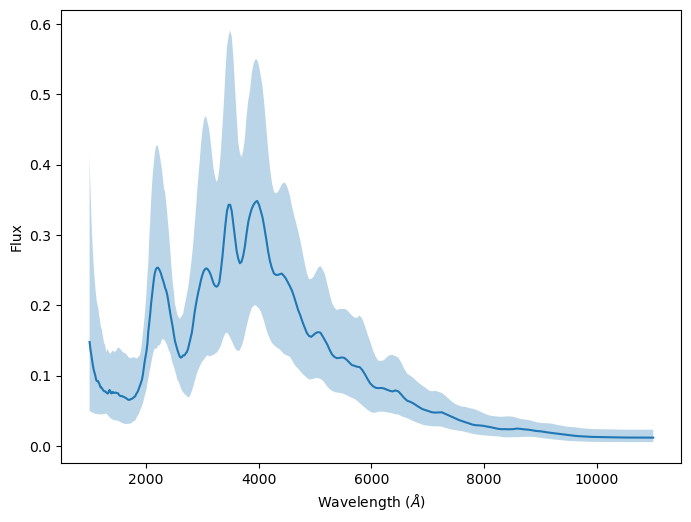

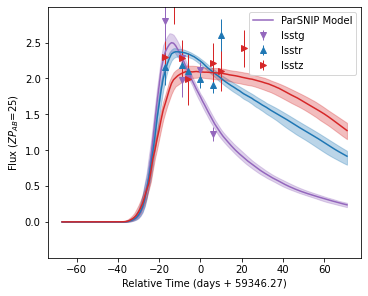

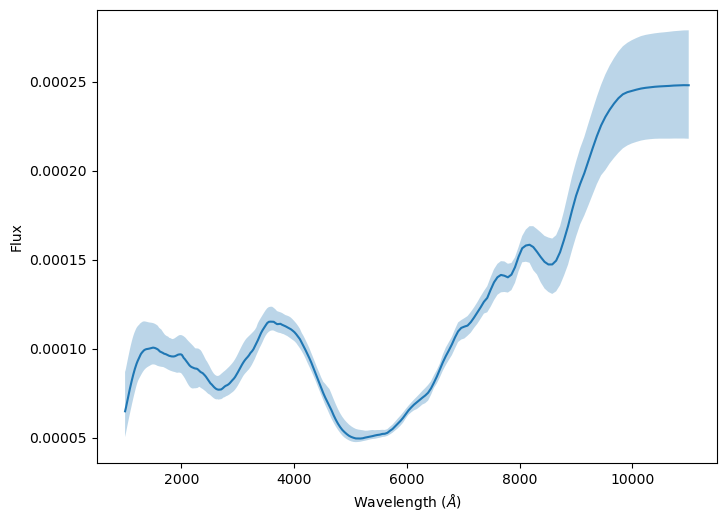

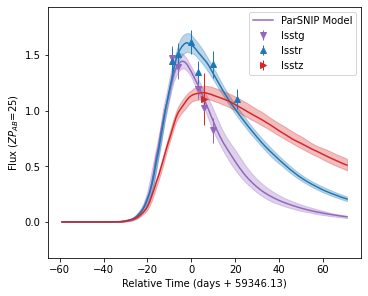

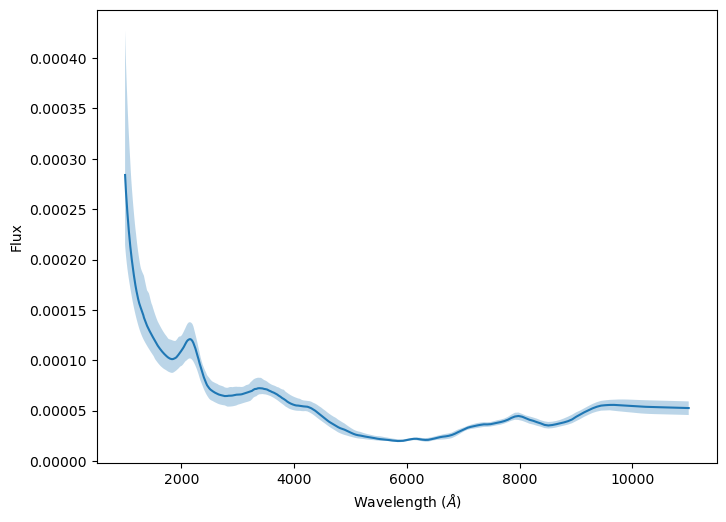

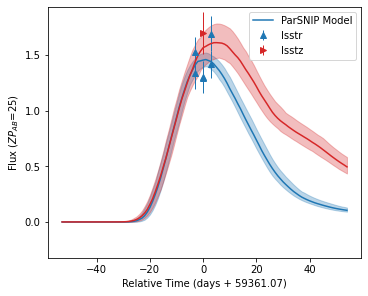

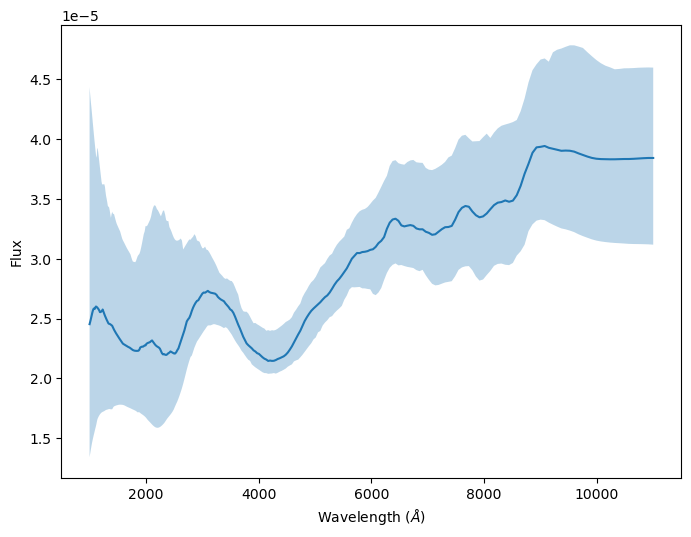

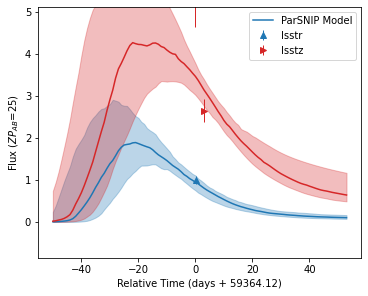

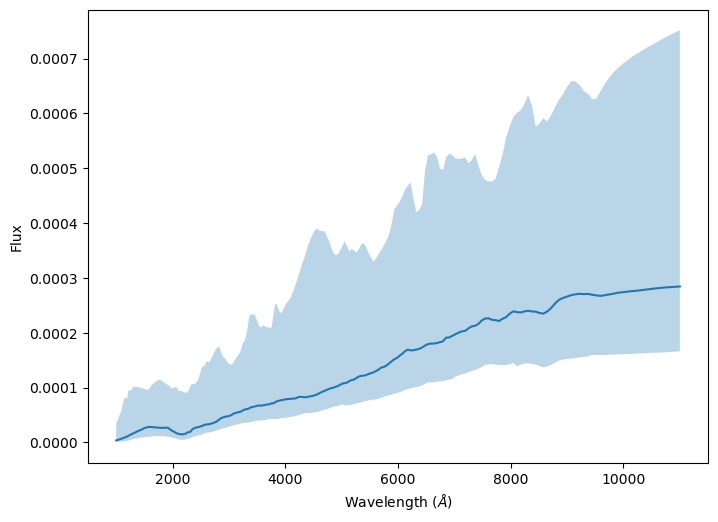

In [10]:
for i in range(0,len(dataset)): # only classify lc with > 4 data points
    parsnip.plot_light_curve(dataset.light_curves[i], model1)
    parsnip.plot_spectrum(dataset.light_curves[i], model1, time=59297.)

In [83]:
dataset_all_wrs.light_curves

array([<Table length=12>
              time           flux      fluxerr    band
            float64        float32     float32    str6
       ------------------ ---------- ----------- ------
        59295.27799854438  1.3695425 0.083780184 ps1::r
        59297.23166343352 0.68309456 0.053806897 ps1::g
        59297.23270480759  1.2860177  0.10073545 ps1::r
        59310.26978909521  1.2500414   0.1145724 ps1::r
       59310.270936665096  1.5711246  0.21318443 ps1::z
         59313.2226029866   1.325512  0.08435899 ps1::r
        59313.22377329604   1.390637  0.15370606 ps1::z
        59316.20851268766  0.8708036  0.08964938 ps1::r
        59316.20966174384  1.4883462  0.19521609 ps1::z
       59319.245280151896 0.97159475    0.083972 ps1::r
        59319.24643760768  0.8631477  0.17898774 ps1::z
        59322.23467318657  0.7406822  0.08467655 ps1::r,
       <Table length=28>
              time           flux      fluxerr    band
            float64        float32     float32    str6
 

/Users/EmilieCote/opt/anaconda3/lib/python3.9/site-packages/parsnip/plotting.py:81: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  ax.errorbar(band_time, band_flux, band_fluxerr, fmt='o', c=c, label=band_name,
/Users/EmilieCote/opt/anaconda3/lib/python3.9/site-packages/parsnip/plotting.py:81: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  ax.errorbar(band_time, band_flux, band_fluxerr, fmt='o', c=c, label=band_name,
/Users/EmilieCote/opt/anaconda3/lib/python3.9/site-packages/parsnip/plotting.py:81: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  ax.errorbar(band_time, band_flux, band_fluxerr, fmt='o', c=c, label=band_name,
/Users/EmilieCote/opt/anacon

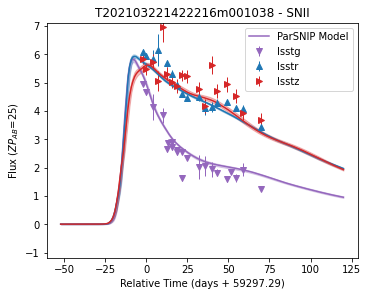

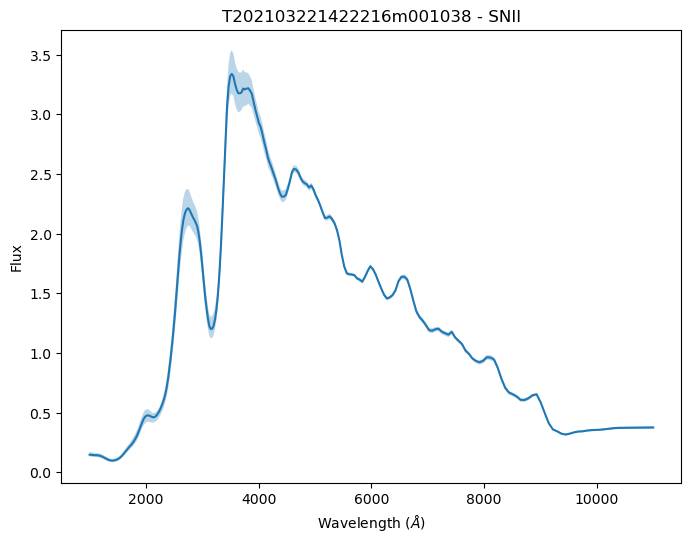

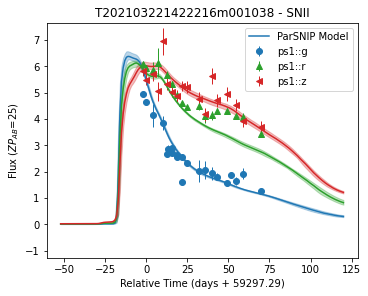

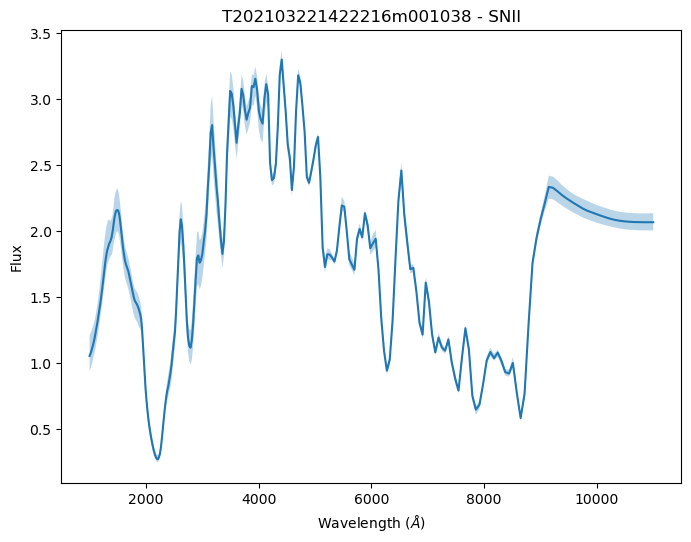

In [90]:
for i in range(0,len(dataset_all_wrs)):
    if dataset_all_wrs.meta[i]['object_id'] == 'T202103221422216m001038':
        parsnip.plot_light_curve(dataset_all_wrs.light_curves[i], model1)
        plt.title(dataset_all_wrs.meta[i]['object_id']+' - SNII')
        parsnip.plot_spectrum(dataset_all_wrs.light_curves[i], model1, time=59297)
        plt.title(dataset_all_wrs.meta[i]['object_id']+' - SNII')
        
for i in range(0,len(dataset_all_wrs_ps1)):
    if dataset_all_wrs_ps1.meta[i]['object_id'] == 'T202103221422216m001038':
        parsnip.plot_light_curve(dataset_all_wrs_ps1.light_curves[i], model)
        plt.title(dataset_all_wrs_ps1.meta[i]['object_id']+' - SNII')
        parsnip.plot_spectrum(dataset_all_wrs_ps1.light_curves[i], model, time=59297)
        plt.title(dataset_all_wrs_ps1.meta[i]['object_id']+' - SNII')

Object ID: T202105241209444p002250


/Users/EmilieCote/opt/anaconda3/lib/python3.9/site-packages/parsnip/plotting.py:81: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  ax.errorbar(band_time, band_flux, band_fluxerr, fmt='o', c=c, label=band_name,
/Users/EmilieCote/opt/anaconda3/lib/python3.9/site-packages/parsnip/plotting.py:81: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  ax.errorbar(band_time, band_flux, band_fluxerr, fmt='o', c=c, label=band_name,


Object ID: T202105241210580p003234


/Users/EmilieCote/opt/anaconda3/lib/python3.9/site-packages/parsnip/plotting.py:81: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  ax.errorbar(band_time, band_flux, band_fluxerr, fmt='o', c=c, label=band_name,


Object ID: T202105241214185m002735


/Users/EmilieCote/opt/anaconda3/lib/python3.9/site-packages/parsnip/plotting.py:81: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  ax.errorbar(band_time, band_flux, band_fluxerr, fmt='o', c=c, label=band_name,


Object ID: T202105241215387p003025


/Users/EmilieCote/opt/anaconda3/lib/python3.9/site-packages/parsnip/plotting.py:81: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  ax.errorbar(band_time, band_flux, band_fluxerr, fmt='o', c=c, label=band_name,
/Users/EmilieCote/opt/anaconda3/lib/python3.9/site-packages/parsnip/plotting.py:81: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  ax.errorbar(band_time, band_flux, band_fluxerr, fmt='o', c=c, label=band_name,


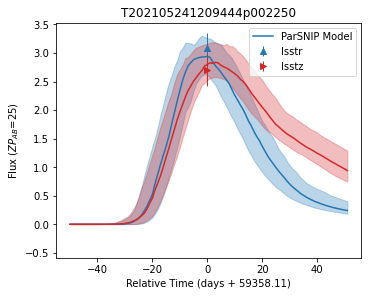

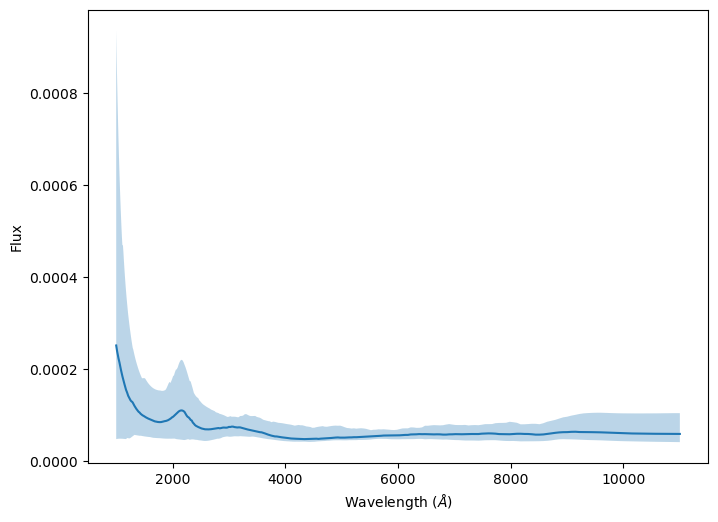

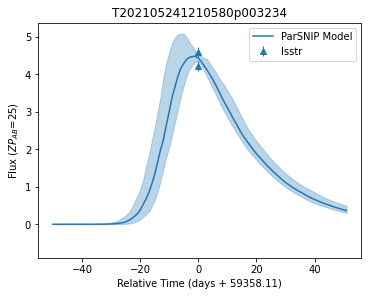

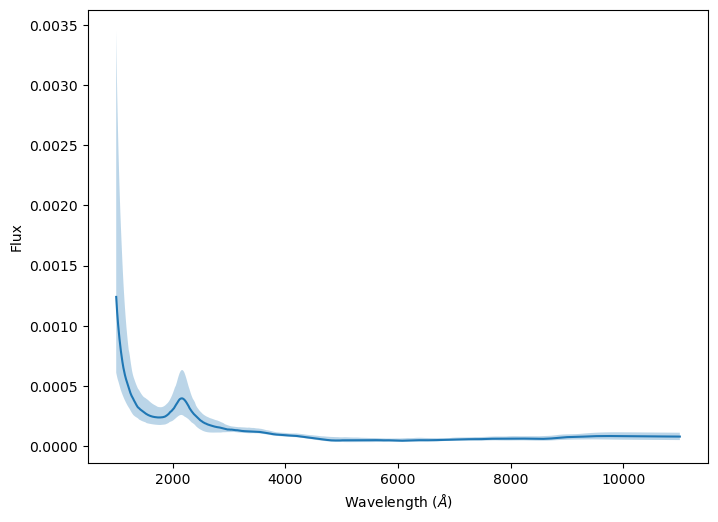

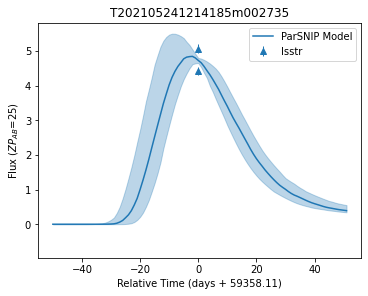

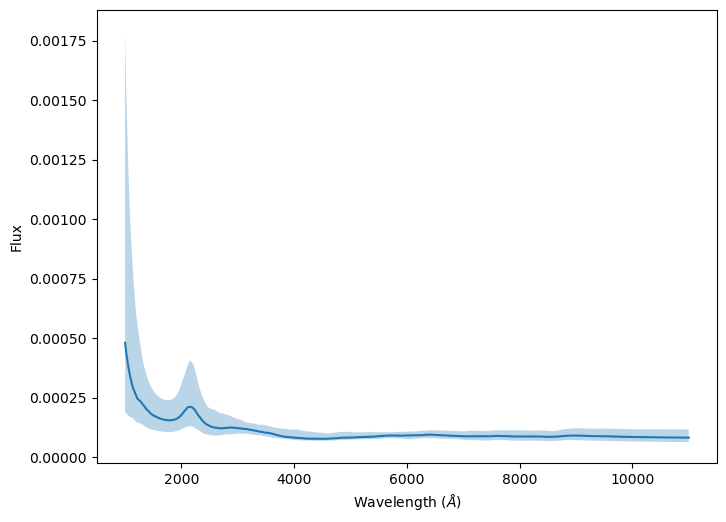

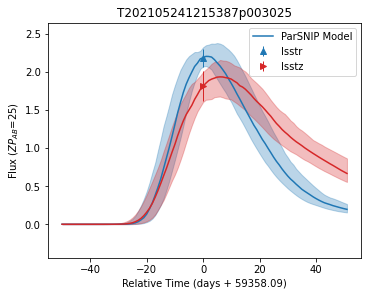

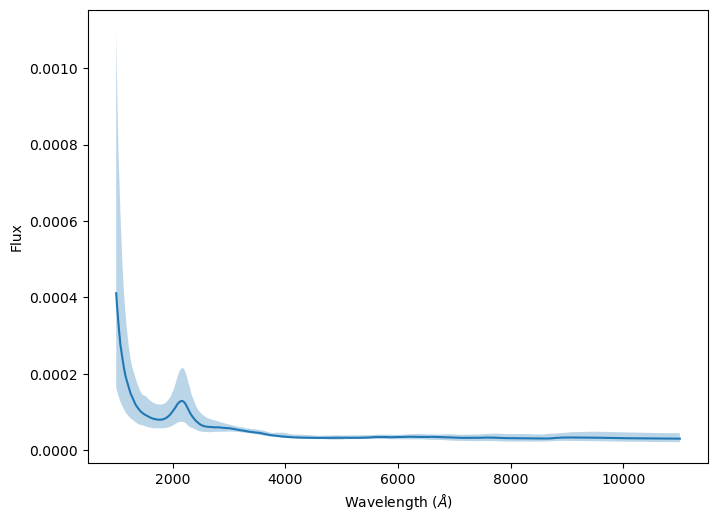

In [114]:
for i in range(500,504): # len(dataset_all)
    print("Object ID:", dataset_all.meta[i]['object_id'])
    parsnip.plot_light_curve(dataset_all.light_curves[i], model1)
    plt.title(dataset_all.meta[i]['object_id'])
    parsnip.plot_spectrum(dataset_all.light_curves[i], model1, time=59297.)
    plt.title(dataset_all.meta[i]['object_id'])
    
# peak highest flux time

In [80]:
dict(dataset[0].meta)

{'object_id': <Column name='object_id' dtype='str23' length=1>
 A202103221409059m023156,
 'ra': <Column name='ra' dtype='float64' length=1>
 212.27475706,
 'dec': <Column name='dec' dtype='float64' length=1>
 -2.53247783,
 'type': <Column name='type' dtype='str7' length=1>
 Unknown,
 'redshift': <Column name='redshift' dtype='float64' length=1>
 0.5241751670837402,
 'hostgal_photoz': <Column name='hostgal_photoz' dtype='float32' length=1>
 0.52417517,
 'hostgal_photoz_err': <Column name='hostgal_photoz_err' dtype='float32' length=1>
 0.16277674}

In [18]:
model2 = parsnip.load_model('plasticc_photoz')


ValueError: No built-in model named 'plasticc_photoz'

In [9]:
model1 = parsnip.load_model('plasticc')

/Users/EmilieCote/opt/anaconda3/lib/python3.9/site-packages/parsnip/parsnip.py:289: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /Users/distiller/project/pytorch/torch/csrc/utils/tensor_new.cpp:210.)
  self.band_interpolate_weights = torch.FloatTensor(band_weights).to(self.device)


In [21]:
predictions = model1.predict_dataset(dataset_all)

Preprocessing dataset: 100%|█████████████████| 554/554 [00:05<00:00, 107.87it/s]


In [22]:
predictions[predictions['object_id']=='A202104121446081p013214']

object_id,ra,dec,type,redshift,z_spec_exists,hostgal_photoz,hostgal_photoz_err,parsnip_reference_time,parsnip_scale,reference_time,reference_time_error,color,color_error,amplitude,amplitude_error,s1,s1_error,s2,s2_error,s3,s3_error,total_s2n,count,count_s2n_3,count_s2n_5,count_s2n_3_pre,count_s2n_3_rise,count_s2n_3_fall,count_s2n_3_post,model_chisq,model_dof,luminosity,luminosity_error
str23,float64,float64,str7,float64,int64,float32,float32,float64,float32,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int64,int64,int64,int64,int64,int64,int64,float32,int64,float64,float32
A202104121446081p013214,221.53405247,1.53746123,Unknown,0.8082495331764221,0,0.80824953,0.19615355,59322.20415729376,1.0303594,59334.920124472104,1.5236965,-0.23631096,0.028458225,0.0028175416,9.718224e-05,-1.4901509,0.13229187,1.8651431,0.15441214,-1.005074,0.32844898,29.59984,12,12,12,0,7,5,0,17.06914,6,-12.216142275890888,0.03746393


In [12]:
predictions.remove_columns(['total_s2n','count','count_s2n_3', 'count_s2n_5', 'count_s2n_3_pre', 'count_s2n_3_rise', 'count_s2n_3_fall',
                           'count_s2n_3_post', 'model_dof'])

In [17]:
predictions.remove_columns(['luminosity', 'luminosity_error'])

In [18]:
predictions

object_id,ra,dec,type,redshift,z_spec_exists,hostgal_photoz,hostgal_photoz_err,parsnip_reference_time,parsnip_scale,reference_time,reference_time_error,color,color_error,amplitude,amplitude_error,s1,s1_error,s2,s2_error,s3,s3_error,model_chisq
str23,float64,float64,str7,float64,int64,float32,float32,float64,float32,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32
A202103221407558m001825,211.98278629,-0.30695087,Unknown,0.4217931032180786,0,0.4217931,0.08276691,59297.2699989584,1.5711246,59305.87038176327,0.4926387,0.105582535,0.027081374,0.01618141,0.00042973968,0.6650888,0.19455063,0.6061594,0.393575,0.8347892,0.6370112,14.452319
A202103221408139m033502,212.05795218,-3.58394667,Unknown,0.7430001497268677,0,0.74300015,0.123186514,59297.362671920084,2.1686318,59310.26802355888,1.7143817,-0.58893365,0.0116355,0.0013228649,1.5683916e-05,-2.0580947,0.0865071,3.6247404,0.12169737,-0.55401176,0.26606575,201.88232
A202103221408412p002445,212.17173702,0.41252734,Unknown,0.30602824687957764,0,0.30602825,0.04898929,59322.23610994359,5.7891965,59304.55703660985,1.0342743,-0.16383773,0.0139570655,0.021057537,0.00014882255,-1.7186718,0.06618966,3.2355776,0.071120024,-0.18040265,0.13100153,1079.8629
A202103221408578m005300,212.2412,-0.8833,Unknown,0.8038440942764282,0,0.8038441,0.08160352,59296.3223509691,1.0942659,59310.913481225754,1.1590263,-0.44122544,0.048217688,0.0010637876,4.5932888e-05,-1.2335732,0.1981327,0.44271988,0.460561,-1.2470269,0.64468896,0.00048707976
A202103221409059m023156,212.27475706,-2.53247783,Unknown,0.5241751670837402,0,0.52417517,0.16277674,59297.30917632439,1.591225,59304.703880666275,1.4192014,0.16922972,0.041719835,0.018206725,0.00050075626,-1.6406775,0.18364602,2.180085,0.2144688,-0.17572959,0.39899728,49.719727
A202103221409405p003222,212.41911883,0.53946084,Unknown,0.44698280096054077,0,0.4469828,0.17842479,59319.24343652009,3.992369,59304.26941556214,0.61605155,-0.11097655,0.01366284,0.021786217,0.00017413644,-0.92042613,0.04726858,2.1193085,0.084128134,-0.04418336,0.18236527,1284.887
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
T202106021430509m023125,217.71235254,-2.52388313,Unknown,0.15156035125255585,0,0.15156035,0.047065422,59367.24048404527,1.4390821,59361.83310298753,6.820371,0.20949444,0.11436684,0.028203549,0.0017766113,-0.029053539,0.5851649,0.6985913,0.97705156,0.2300153,0.96291125,1.6441689
T202106021434224p023158,218.59339421,2.53281567,Unknown,0.9559399485588074,0,0.95593995,0.22913234,59367.08861594002,11.768071,59386.72673849861,0.7080797,-0.3761259,0.05166125,0.011081017,0.00010368031,-1.6035761,0.26115957,-0.726273,0.46153384,-0.07038915,0.85579693,562.3222


In [14]:
predictions_ps1 = model.predict_dataset(dataset_all_wrs_ps1)

Preprocessing dataset: 100%|█████████████████| 554/554 [00:04<00:00, 114.49it/s]


In [15]:
predictions_ps1

object_id,ra,dec,type,redshift,z_spec_exists,hostgal_photoz,hostgal_photoz_err,parsnip_reference_time,parsnip_scale,reference_time,reference_time_error,color,color_error,amplitude,amplitude_error,s1,s1_error,s2,s2_error,s3,s3_error,total_s2n,count,count_s2n_3,count_s2n_5,count_s2n_3_pre,count_s2n_3_rise,count_s2n_3_fall,count_s2n_3_post,model_chisq,model_dof,luminosity,luminosity_error
str23,float64,float64,str7,float64,int64,float32,float32,float64,float32,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int64,int64,int64,int64,int64,int64,int64,float32,int64,float64,float32
A202103221407558m001825,211.98278629,-0.30695087,Unknown,0.4217931032180786,0,0.4217931,0.08276691,59297.2699989584,1.5711246,59302.17549269467,1.2150722,-0.15461011,0.05487919,0.021979623,0.00058684585,-1.2346786,0.7328864,0.26192787,0.9544807,0.021548182,0.2542714,38.465424,12,12,11,0,3,9,0,30.041235,6,-12.74237828724037,0.028995553
A202103221408139m033502,212.05795218,-3.58394667,Unknown,0.7430001497268677,0,0.74300015,0.123186514,59297.362671920084,2.1686318,59314.36143977287,3.2925143,-0.4276282,0.027308669,0.017224412,0.00020658739,-0.82169753,0.31284985,0.4904272,0.7194556,2.4664366,0.16888641,87.72656,28,24,24,0,10,12,2,368.18542,22,-13.95806631466371,0.0130228195
A202103221408412p002445,212.17173702,0.41252734,Unknown,0.30602824687957764,0,0.30602825,0.04898929,59322.23610994359,5.7891965,59304.67382928868,1.0126333,-0.2465191,0.013364166,0.06466352,0.00045728096,-0.983388,0.13997106,1.8511912,0.22542688,1.9984877,0.04163054,171.9202,49,49,49,0,7,39,3,1122.4299,43,-13.100438077525581,0.0076781325
A202103221408578m005300,212.2412,-0.8833,Unknown,0.8038440942764282,0,0.8038441,0.08160352,59296.3223509691,1.0942659,59307.15714882829,3.2005756,-0.37541193,0.066216044,0.007610284,0.0003325435,-0.27986473,0.46149454,-0.2294148,0.9488069,1.0567944,0.18708201,23.573483,2,2,2,0,2,0,0,13.012281,-4,-13.280420470331151,0.047473222
A202103221409059m023156,212.27475706,-2.53247783,Unknown,0.5241751670837402,0,0.52417517,0.16277674,59297.30917632439,1.591225,59292.96008002617,4.604806,-0.03928942,0.07469038,0.043862615,0.0012157051,-0.5227707,0.4832094,0.23610501,0.8018099,1.4311117,0.14236173,37.493214,21,21,20,0,0,20,1,69.46919,15,-14.05473441870587,0.03010018
A202103221409405p003222,212.41911883,0.53946084,Unknown,0.44698280096054077,0,0.4469828,0.17842479,59319.24343652009,3.992369,59298.07701844453,1.6209389,-0.32516658,0.02239317,0.035657674,0.00028362504,-1.190538,0.19155817,1.774309,0.30661708,1.4615288,0.041746482,143.93268,54,54,54,0,6,37,11,946.7516,48,-13.41692705665453,0.008636259
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
T202106021430509m023125,217.71235254,-2.52388313,Unknown,0.15156035125255585,0,0.15156035,0.047065422,59367.24048404527,1.4390821,59360.24276285005,4.176531,-0.09809215,0.13542031,0.040168744,0.0025967995,-0.032097563,1.0566372,0.069191135,1.0616537,-0.12791462,0.6659242,16.061172,2,2,2,0,0,2,0,14.470034,-4,-10.871381054555982,0.07028793
T202106021434224p023158,218.59339421,2.53281567,Unknown,0.9559399485588074,0,0.95593995,0.22913234,59367.08861594002,11.768071,59386.29839377205,1.45469,-0.5018116,0.030152665,0.035277218,0.00032911473,-0.080592364,0.29223278,-0.30716813,0.8207831,1.3220334,0.1213977,142.9434,6,6,6,0,6,0,0,440.22345,0,-15.407994139022001,0.01012957


In [25]:
predictions_all = model1.predict_dataset(dataset_all[12:132])

Preprocessing dataset: 100%|██████████████████| 120/120 [00:02<00:00, 45.03it/s]


In [16]:
predictions_plasticc_train = Table.read('predictions/parsnip_predictions_plasticc_train_aug_100.h5')
predictions_plasticc_test = Table.read('predictions/parsnip_predictions_plasticc_test.h5')
classifier_plasticc = parsnip.Classifier()

In [27]:
classifications_plasticc_train = classifier_plasticc.train(predictions_plasticc_train)

Training classifier with keys:
    color
    color_error
    s1
    s1_error
    s2
    s2_error
    s3
    s3_error
    luminosity
    luminosity_error
    reference_time_error
[100]	valid_0's multi_logloss: 0.524034
[100]	valid_0's multi_logloss: 0.525304
[100]	valid_0's multi_logloss: 0.544961
[100]	valid_0's multi_logloss: 0.564758
[100]	valid_0's multi_logloss: 0.462797
[100]	valid_0's multi_logloss: 0.527013
[100]	valid_0's multi_logloss: 0.55661
[100]	valid_0's multi_logloss: 0.487204
[100]	valid_0's multi_logloss: 0.499258
[100]	valid_0's multi_logloss: 0.544764


In [120]:
classifier_plasticc.write('./predictions/classifier')

In [14]:

classifier_plasticc = parsnip.Classifier.load('./predictions/classifier')

In [18]:
classifications_plasticc_test = classifier_plasticc.classify(predictions_plasticc_test)

Macro averaged completeness (Villar et al. 2020): 0.8130
Fraction correct: 0.8007


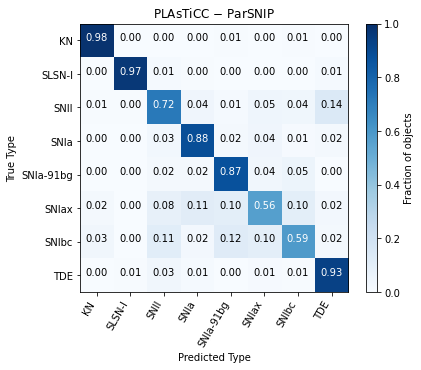

In [19]:
parsnip.plot_confusion_matrix(predictions_plasticc_test, 
                              classifications_plasticc_test, 
                              figsize=(6, 5), title='PLAsTiCC $-$ ParSNIP')
plt.savefig('plasticc_loaded_parsnip_confusion_matrix.pdf')

In [45]:
classifications_DECam_dataset_12_132 = classifier_plasticc.classify(predictions_all)

In [19]:
classifications_plastic_all = classifier_plasticc.classify(predictions)

KeyError: 'luminosity'

In [247]:
len(classifications_plastic_all)

554

In [16]:
classifications_plastic_all

object_id,KN,SLSN-I,SNII,SNIa,SNIa-91bg,SNIax,SNIbc,TDE
str23,float64,float64,float64,float64,float64,float64,float64,float64
A202103221407558m001825,0.02437765303643351,0.0003397210049842691,0.019303088725504895,0.004827153803213555,0.019531579205773135,0.8434849414551634,0.07826965474719383,0.009866208021733327
A202103221408139m033502,0.0012625092722370666,0.0014477844663512245,0.00298062660709552,0.001320295575352475,0.0002991829271663441,0.0006571826432857877,0.000549270225923372,0.9914831482825882
A202103221408412p002445,0.008483278638024871,0.006668375544117144,0.12094513330907722,0.024428435298302752,0.003183116652499811,0.009368489428727901,0.005347990350066331,0.821575180779184
A202103221408578m005300,0.01678543615805502,0.010317478693315844,0.02478290670631876,0.009600271407261787,0.0025627138548245136,0.01209267955043615,0.009740062852056187,0.9141184507777316
A202103221409059m023156,0.002940023410131416,0.005962499793535006,0.8084251918163796,0.02982456959578734,0.022271833093272842,0.027039605391729275,0.028636765299411393,0.07489951159975301
A202103221409405p003222,0.005401074696966501,0.006924851204024489,0.12021204024579202,0.09259309257584161,0.004704006668138086,0.014975376893274167,0.010990540019085771,0.7441990176968774
...,...,...,...,...,...,...,...,...
T202106021430509m023125,0.2648116180925687,0.001733333878268586,0.047978645023926104,0.01624838856707871,0.4333369852114458,0.11328180858898007,0.1069974666019351,0.015611754035796992
T202106021434224p023158,0.0030633152670686637,0.004549178284210665,0.2548471462534471,0.023123353021285896,0.0023607678262935025,0.005640760657953321,0.012836391878990846,0.6935790868107501


In [20]:
raw_predictions = Table.read('predictions/parsnip_predictions_ps1_aug_100.h5')

# Only keep predictions for objects in the supervised sample
predictions_ps1_train = raw_predictions[raw_predictions['supervised']].copy()

# This is a dataset containing both augmented and original objects.
# Make a mask to pull out the original objects.
original_mask_ps1 = ~predictions_ps1_train['augmented']

Training classifier with keys:
    color
    color_error
    s1
    s1_error
    s2
    s2_error
    s3
    s3_error
    luminosity
    luminosity_error
    reference_time_error
[100]	valid_0's multi_logloss: 0.300127
[100]	valid_0's multi_logloss: 1.01522
[100]	valid_0's multi_logloss: 0.386745
[100]	valid_0's multi_logloss: 0.849632
[100]	valid_0's multi_logloss: 0.386095
[100]	valid_0's multi_logloss: 0.903243
[100]	valid_0's multi_logloss: 0.474693
[100]	valid_0's multi_logloss: 0.512012
[100]	valid_0's multi_logloss: 0.285442
[100]	valid_0's multi_logloss: 1.40803
Macro averaged completeness (Villar et al. 2020): 0.7888
Fraction correct: 0.8923


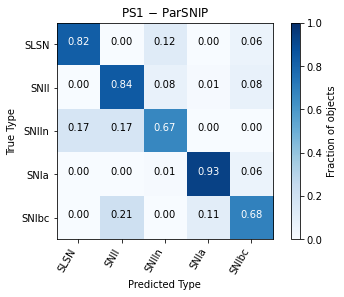

In [21]:
classifier_ps1 = parsnip.Classifier()
classifications_ps1_train = classifier_ps1.train(predictions_ps1_train)
parsnip.plot_confusion_matrix(predictions_ps1_train[original_mask_ps1], classifications_ps1_train[original_mask_ps1],
                              title='PS1 $-$ ParSNIP')
plt.savefig('ps1_confusion_matrix.png')

In [22]:
classifier_ps1.write('./predictions/classifier_ps1')

In [50]:
classifications_ps1_DECam = classifier_ps1.classify(predictions_all)

In [254]:
classifications_ps1_on_plasticc_predictions = classifier_ps1.classify(predictions)

In [25]:
classifications_ps1_on_ps1_predictions = classifier_ps1.classify(predictions_ps1)

In [26]:
classifications_ps1_on_ps1_predictions

object_id,SLSN,SNII,SNIIn,SNIa,SNIbc
str23,float64,float64,float64,float64,float64
A202103221407558m001825,0.003771496586120333,0.030559876453987535,0.0548282763877187,0.8688579647340868,0.04198238583808664
A202103221408139m033502,0.01307632215334988,0.3700055373736747,0.5588883368837989,0.009149387514685664,0.048880416074490965
A202103221408412p002445,0.0092021750802211,0.2145904670490914,0.7619745718495897,0.003967316017505171,0.010265470003592654
A202103221408578m005300,0.02232960278782013,0.466474391300517,0.09206888750542637,0.031039257856316716,0.38808786054991984
A202103221409059m023156,0.005604616528583512,0.8219824997314034,0.08085408258860396,0.01372665450966247,0.07783214664174656
A202103221409405p003222,0.025462569027925257,0.5218461421653648,0.4135584840531087,0.010794301810564752,0.028338502943036366
...,...,...,...,...,...
T202106021430509m023125,0.0015912329795704943,0.05014467879965308,0.012113378926499973,0.9009272984966492,0.035223410797627336
T202106021434224p023158,0.011279575718556067,0.799510368722591,0.11110447944595936,0.011819036625116254,0.06628653948777731


In [249]:
predictions.keys()

predictions_cpWithType = predictions.copy()

classification_dict = {}

print(classifications_plastic_all.keys())

keys = ['KN', 'SLSN-I', 'SNII', 'SNIa', 'SNIa-91bg', 'SNIax', 'SNIbc', 'TDE']
for i in classifications_plastic_all:
    print(i['object_id'])
    prob = [i[key] for key in keys]
    classif = keys[prob.index(max(prob))]
    classification_dict[i['object_id']] = {'type':classif, 'prob': max(prob)}
    print('\n      ', keys[prob.index(max(prob))], max(prob),'\n')

['object_id', 'KN', 'SLSN-I', 'SNII', 'SNIa', 'SNIa-91bg', 'SNIax', 'SNIbc', 'TDE']
A202103221407558m001825

       SNIax 0.8434849414551634 

A202103221408139m033502

       TDE 0.9914831482825882 

A202103221408412p002445

       TDE 0.821575180779184 

A202103221408578m005300

       TDE 0.9141184507777316 

A202103221409059m023156

       SNII 0.8084251918163796 

A202103221409405p003222

       TDE 0.7441990176968774 

A202103221410297m035538

       SNII 0.877643423085843 

A202103221410376p013632

       SNIax 0.8538934181854385 

A202103221411041m031721

       TDE 0.9785970381708896 

A202103221411363p015959

       KN 0.7886832807821794 

A202103221412177p010939

       SNIax 0.6863793508026397 

A202103221415141m004911

       KN 0.5290928888257769 

A202103221415411m034637

       KN 0.5114594066635206 

A202103221415420m010306

       SNIax 0.5894770545173668 

A202103221415434p012141

       KN 0.441434637047181 

A202103221415581p020343

       TDE 0.7172660157266892 

A

       SNIax 0.3089598631966829 

T202105241217452p015741

       SNIax 0.4764653574103261 

T202105241219403m003519

       TDE 0.7475553382083978 

T202105241221477m002825

       TDE 0.36258873986000917 

T202105241402453p061222

       KN 0.7175685361253 

T202105271158002m012128

       KN 0.2457645678700006 

T202105271158045m012917

       SNII 0.4355656254007842 

T202105271200139p012106

       TDE 0.7627408106994938 

T202105271206174m005511

       TDE 0.6892334318645095 

T202105271206523p002307

       KN 0.473029673568307 

T202105271207516m015027

       TDE 0.6079551002839201 

T202105271211019p001234

       KN 0.32634950684396485 

T202105271211176m011116

       TDE 0.41627831901614076 

T202105271212080m002219

       TDE 0.6713418259758311 

T202105271214387m014717

       TDE 0.8867241917056754 

T202105271214440m015732

       TDE 0.8434101783243969 

T202105271214513m015956

       TDE 0.7110250293051722 

T202105271214523p012133

       SNIax 0.6313558074572169

In [250]:
classification_dict

{'A202103221407558m001825': {'type': 'SNIax', 'prob': 0.8434849414551634},
 'A202103221408139m033502': {'type': 'TDE', 'prob': 0.9914831482825882},
 'A202103221408412p002445': {'type': 'TDE', 'prob': 0.821575180779184},
 'A202103221408578m005300': {'type': 'TDE', 'prob': 0.9141184507777316},
 'A202103221409059m023156': {'type': 'SNII', 'prob': 0.8084251918163796},
 'A202103221409405p003222': {'type': 'TDE', 'prob': 0.7441990176968774},
 'A202103221410297m035538': {'type': 'SNII', 'prob': 0.877643423085843},
 'A202103221410376p013632': {'type': 'SNIax', 'prob': 0.8538934181854385},
 'A202103221411041m031721': {'type': 'TDE', 'prob': 0.9785970381708896},
 'A202103221411363p015959': {'type': 'KN', 'prob': 0.7886832807821794},
 'A202103221412177p010939': {'type': 'SNIax', 'prob': 0.6863793508026397},
 'A202103221415141m004911': {'type': 'KN', 'prob': 0.5290928888257769},
 'A202103221415411m034637': {'type': 'KN', 'prob': 0.5114594066635206},
 'A202103221415420m010306': {'type': 'SNIax', 'p

In [251]:
predictions_cpWithType.add_column(1.0, name='type_prob', index=4)

In [252]:
for i in predictions_cpWithType:
    print(i['object_id'])
    i['type'] = classification_dict[i['object_id']]['type']
    i['type_prob'] = classification_dict[i['object_id']]['prob']
    
predictions_cpWithType['type'] = predictions_cpWithType['type'].astype(bytes)

A202103221407558m001825
A202103221408139m033502
A202103221408412p002445
A202103221408578m005300
A202103221409059m023156
A202103221409405p003222
A202103221410297m035538
A202103221410376p013632
A202103221411041m031721
A202103221411363p015959
A202103221412177p010939
A202103221415141m004911
A202103221415411m034637
A202103221415420m010306
A202103221415434p012141
A202103221415581p020343
A202103221416166p021022
A202103221416444m013014
A202103221419493m005423
A202103221421240m003354
A202103221422364m011342
A202103221422581m024328
A202103221425310m001309
A202103221425464m000705
A202103221425535p014857
A202103221426202m015037
A202103221428463p020055
A202103221429185p000158
A202103221430059m013946
A202103221431564m034803
A202103221432532p005029
A202103221435010m003706
A202103221435424m001446
A202103221435448m004458
A202103221437106m015403
A202103221437253m032002
A202103221437327p002223
A202103221437382p020501
A202103221441336p003659
A202103221442037p000433
A202103221442452m011300
A202103221443116

/Users/EmilieCote/opt/anaconda3/lib/python3.9/site-packages/astropy/table/row.py:65: StringTruncateWarning: truncated right side string(s) longer than 7 character(s) during assignment
  self._table.columns[item][self._index] = val
/Users/EmilieCote/opt/anaconda3/lib/python3.9/site-packages/astropy/table/row.py:65: StringTruncateWarning: truncated right side string(s) longer than 7 character(s) during assignment
  self._table.columns[item][self._index] = val
/Users/EmilieCote/opt/anaconda3/lib/python3.9/site-packages/astropy/table/row.py:65: StringTruncateWarning: truncated right side string(s) longer than 7 character(s) during assignment
  self._table.columns[item][self._index] = val
/Users/EmilieCote/opt/anaconda3/lib/python3.9/site-packages/astropy/table/row.py:65: StringTruncateWarning: truncated right side string(s) longer than 7 character(s) during assignment
  self._table.columns[item][self._index] = val
/Users/EmilieCote/opt/anaconda3/lib/python3.9/site-packages/astropy/table/ro

In [253]:
predictions_cpWithType

object_id,ra,dec,type,type_prob,redshift,z_spec_exists,hostgal_photoz,hostgal_photoz_err,parsnip_reference_time,parsnip_scale,reference_time,reference_time_error,color,color_error,amplitude,amplitude_error,s1,s1_error,s2,s2_error,s3,s3_error,total_s2n,count,count_s2n_3,count_s2n_5,count_s2n_3_pre,count_s2n_3_rise,count_s2n_3_fall,count_s2n_3_post,model_chisq,model_dof,luminosity,luminosity_error
str23,float64,float64,bytes7,float64,float64,int64,float32,float32,float64,float32,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int64,int64,int64,int64,int64,int64,int64,float32,int64,float64,float32
A202103221407558m001825,211.98278629,-0.30695087,SNIax,0.8434849414551634,0.4217931032180786,0,0.4217931,0.08276691,59297.2699989584,1.5711246,59305.87038176327,0.4926387,0.105582535,0.027081374,0.01618141,0.00042973968,0.6650888,0.19455063,0.6061594,0.393575,0.8347892,0.6370112,38.465424,12,12,11,0,3,9,0,14.452319,6,-12.409868292733535,0.028841326
A202103221408139m033502,212.05795218,-3.58394667,TDE,0.9914831482825882,0.7430001497268677,0,0.74300015,0.123186514,59297.362671920084,2.1686318,59310.26802355888,1.7143817,-0.58893365,0.0116355,0.0013228649,1.5683916e-05,-2.0580947,0.0865071,3.6247404,0.12169737,-0.55401176,0.26606575,87.72656,28,24,24,0,4,18,2,201.88232,22,-11.171492904629531,0.012873145
A202103221408412p002445,212.17173702,0.41252734,TDE,0.821575180779184,0.30602824687957764,0,0.30602825,0.04898929,59322.23610994359,5.7891965,59304.55703660985,1.0342743,-0.16383773,0.0139570655,0.021057537,0.00014882255,-1.7186718,0.06618966,3.2355776,0.071120024,-0.18040265,0.13100153,171.9202,49,49,49,0,7,39,3,1079.8629,43,-11.882307965831245,0.007673505
A202103221408578m005300,212.2412,-0.8833,TDE,0.9141184507777316,0.8038440942764282,0,0.8038441,0.08160352,59296.3223509691,1.0942659,59310.913481225754,1.1590263,-0.44122544,0.048217688,0.0010637876,4.5932888e-05,-1.2335732,0.1981327,0.44271988,0.460561,-1.2470269,0.64468896,23.573483,2,2,2,0,2,0,0,0.00048707976,-4,-11.144056487176854,0.046909787
A202103221409059m023156,212.27475706,-2.53247783,SNII,0.8084251918163796,0.5241751670837402,0,0.52417517,0.16277674,59297.30917632439,1.591225,59304.703880666275,1.4192014,0.16922972,0.041719835,0.018206725,0.00050075626,-1.6406775,0.18364602,2.180085,0.2144688,-0.17572959,0.39899728,37.493214,21,21,20,0,4,17,0,49.719727,15,-13.100077817753721,0.029869553
A202103221409405p003222,212.41911883,0.53946084,TDE,0.7441990176968774,0.44698280096054077,0,0.4469828,0.17842479,59319.24343652009,3.992369,59304.26941556214,0.61605155,-0.11097655,0.01366284,0.021786217,0.00017413644,-0.92042613,0.04726858,2.1193085,0.084128134,-0.04418336,0.18236527,143.93268,54,54,54,0,8,40,6,1284.887,48,-12.881999688490467,0.008678455
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
T202106021430509m023125,217.71235254,-2.52388313,SNIa-91,0.4333369852114458,0.15156035125255585,0,0.15156035,0.047065422,59367.24048404527,1.4390821,59361.83310298753,6.820371,0.20949444,0.11436684,0.028203549,0.0017766113,-0.029053539,0.5851649,0.6985913,0.97705156,0.2300153,0.96291125,16.061172,2,2,2,0,0,2,0,1.6441689,-4,-10.48742033067903,0.06848387
T202106021434224p023158,218.59339421,2.53281567,TDE,0.6935790868107501,0.9559399485588074,0,0.95593995,0.22913234,59367.08861594002,11.768071,59386.72673849861,0.7080797,-0.3761259,0.05166125,0.011081017,0.00010368031,-1.6035761,0.26115957,-0.726273,0.46153384,-0.07038915,0.85579693,142.9434,6,6,6,0,6,0,0,562.3222,0,-14.150708067244658,0.010159083


Macro averaged completeness (Villar et al. 2020): 0.2806
Fraction correct: 0.0271


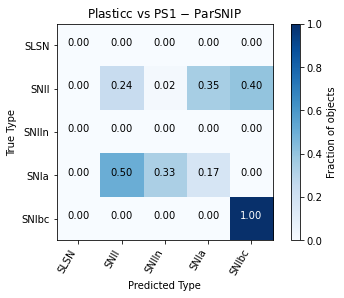

In [256]:
parsnip.plot_confusion_matrix(predictions_cpWithType, classifications_ps1_on_plasticc_predictions,
                              title='Plasticc vs PS1 $-$ ParSNIP')
plt.savefig('DECam_confusion_matrix_Plasticc_Ps1.pdf')

In [257]:
predictions_cpWithType.write('554_predictions_PLASTICC_PLSTC_Classifications.hdf5', path='predictions')

In [23]:
a = Table.read('554_predictions_PLASTICC_PLSTC_Classifications.hdf5', path='predictions')

In [24]:
a

object_id,ra,dec,type,type_prob,redshift,z_spec_exists,hostgal_photoz,hostgal_photoz_err,parsnip_reference_time,parsnip_scale,reference_time,reference_time_error,color,color_error,amplitude,amplitude_error,s1,s1_error,s2,s2_error,s3,s3_error,total_s2n,count,count_s2n_3,count_s2n_5,count_s2n_3_pre,count_s2n_3_rise,count_s2n_3_fall,count_s2n_3_post,model_chisq,model_dof,luminosity,luminosity_error
bytes23,float64,float64,bytes7,float64,float64,int64,float32,float32,float64,float32,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int64,int64,int64,int64,int64,int64,int64,float32,int64,float64,float32
A202103221407558m001825,211.98278629,-0.30695087,SNIax,0.8434849414551634,0.4217931032180786,0,0.4217931,0.08276691,59297.2699989584,1.5711246,59305.87038176327,0.4926387,0.105582535,0.027081374,0.01618141,0.00042973968,0.6650888,0.19455063,0.6061594,0.393575,0.8347892,0.6370112,38.465424,12,12,11,0,3,9,0,14.452319,6,-12.409868292733535,0.028841326
A202103221408139m033502,212.05795218,-3.58394667,TDE,0.9914831482825882,0.7430001497268677,0,0.74300015,0.123186514,59297.362671920084,2.1686318,59310.26802355888,1.7143817,-0.58893365,0.0116355,0.0013228649,1.5683916e-05,-2.0580947,0.0865071,3.6247404,0.12169737,-0.55401176,0.26606575,87.72656,28,24,24,0,4,18,2,201.88232,22,-11.171492904629531,0.012873145
A202103221408412p002445,212.17173702,0.41252734,TDE,0.821575180779184,0.30602824687957764,0,0.30602825,0.04898929,59322.23610994359,5.7891965,59304.55703660985,1.0342743,-0.16383773,0.0139570655,0.021057537,0.00014882255,-1.7186718,0.06618966,3.2355776,0.071120024,-0.18040265,0.13100153,171.9202,49,49,49,0,7,39,3,1079.8629,43,-11.882307965831245,0.007673505
A202103221408578m005300,212.2412,-0.8833,TDE,0.9141184507777316,0.8038440942764282,0,0.8038441,0.08160352,59296.3223509691,1.0942659,59310.913481225754,1.1590263,-0.44122544,0.048217688,0.0010637876,4.5932888e-05,-1.2335732,0.1981327,0.44271988,0.460561,-1.2470269,0.64468896,23.573483,2,2,2,0,2,0,0,0.00048707976,-4,-11.144056487176854,0.046909787
A202103221409059m023156,212.27475706,-2.53247783,SNII,0.8084251918163796,0.5241751670837402,0,0.52417517,0.16277674,59297.30917632439,1.591225,59304.703880666275,1.4192014,0.16922972,0.041719835,0.018206725,0.00050075626,-1.6406775,0.18364602,2.180085,0.2144688,-0.17572959,0.39899728,37.493214,21,21,20,0,4,17,0,49.719727,15,-13.100077817753721,0.029869553
A202103221409405p003222,212.41911883,0.53946084,TDE,0.7441990176968774,0.44698280096054077,0,0.4469828,0.17842479,59319.24343652009,3.992369,59304.26941556214,0.61605155,-0.11097655,0.01366284,0.021786217,0.00017413644,-0.92042613,0.04726858,2.1193085,0.084128134,-0.04418336,0.18236527,143.93268,54,54,54,0,8,40,6,1284.887,48,-12.881999688490467,0.008678455
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
T202106021430509m023125,217.71235254,-2.52388313,SNIa-91,0.4333369852114458,0.15156035125255585,0,0.15156035,0.047065422,59367.24048404527,1.4390821,59361.83310298753,6.820371,0.20949444,0.11436684,0.028203549,0.0017766113,-0.029053539,0.5851649,0.6985913,0.97705156,0.2300153,0.96291125,16.061172,2,2,2,0,0,2,0,1.6441689,-4,-10.48742033067903,0.06848387
T202106021434224p023158,218.59339421,2.53281567,TDE,0.6935790868107501,0.9559399485588074,0,0.95593995,0.22913234,59367.08861594002,11.768071,59386.72673849861,0.7080797,-0.3761259,0.05166125,0.011081017,0.00010368031,-1.6035761,0.26115957,-0.726273,0.46153384,-0.07038915,0.85579693,142.9434,6,6,6,0,6,0,0,562.3222,0,-14.150708067244658,0.010159083


Macro averaged completeness (Villar et al. 2020): 0.1752
Fraction correct: 0.0722


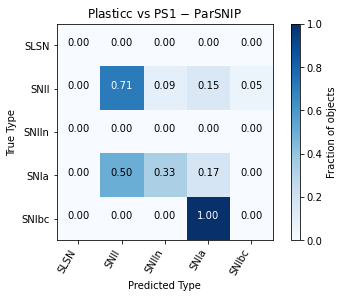

In [27]:
#classifications_ps1_on_ps1_predictions
parsnip.plot_confusion_matrix(a, classifications_ps1_on_ps1_predictions,
                              title='Plasticc vs PS1 $-$ ParSNIP')
plt.savefig('DECam_confusion_matrix_Plasticc_Ps1_bothmodels.pdf')


In [106]:
classifications_ps1_DECam

object_id,SLSN,SNII,SNIIn,SNIa,SNIbc
str23,float64,float64,float64,float64,float64
A202103221415141m004911,0.0040415146400263596,0.16692687619015417,0.009299907873542674,0.6200208865845233,0.19971081471175334
A202103221415411m034637,0.009866400861712005,0.34828138655225527,0.14197129059111038,0.14362598658469927,0.3562549354102232
A202103221415420m010306,0.006898493516196427,0.4882811339497885,0.02468871130511011,0.07998381368258815,0.4001478475463169
A202103221415434p012141,0.009298858616042547,0.6854444883576054,0.11556048570685706,0.08710903904257584,0.10258712827691911
A202103221415581p020343,0.009305963321713765,0.0684700281191288,0.04160912663761894,0.8580977523770453,0.02251712954449308
A202103221416166p021022,0.016979762107906117,0.4502593850245192,0.26421173509831675,0.2234384115395145,0.04511070622974349
...,...,...,...,...,...
A202104121409174p012921,0.01101408722929675,0.4922134283588167,0.034276176751720136,0.03868184931624376,0.4238144583439227
A202104121410160m031040,0.007960721034444963,0.8245422834765501,0.1397996009172357,0.0055629031399157996,0.022134491431853483


In [28]:
print(classifications_ps1_on_ps1_predictions.keys())

['object_id', 'SLSN', 'SNII', 'SNIIn', 'SNIa', 'SNIbc']


In [29]:
predictions_cpWithType_PS1 = predictions_ps1.copy()

classification_dict_ps1 = {}


keys_ps1 = ['SLSN', 'SNII', 'SNIIn', 'SNIa', 'SNIbc']
for i in classifications_ps1_on_ps1_predictions:
    print(i['object_id'])
    prob = [i[key] for key in keys_ps1]
    classif = keys_ps1[prob.index(max(prob))]
    classification_dict_ps1[i['object_id']] = {'type':classif, 'prob': max(prob)}
    print('\n      ', keys_ps1[prob.index(max(prob))], max(prob),'\n')
    
predictions_cpWithType_PS1.add_column(1.0, name='type_prob', index=4)

for i in predictions_cpWithType_PS1:
    print(i['object_id'])
    i['type'] = classification_dict_ps1[i['object_id']]['type']
    i['type_prob'] = classification_dict_ps1[i['object_id']]['prob']
    
predictions_cpWithType_PS1['type'] = predictions_cpWithType_PS1['type'].astype(bytes)
    
predictions_cpWithType_PS1

A202103221407558m001825

       SNIa 0.8688579647340868 

A202103221408139m033502

       SNIIn 0.5588883368837989 

A202103221408412p002445

       SNIIn 0.7619745718495897 

A202103221408578m005300

       SNII 0.466474391300517 

A202103221409059m023156

       SNII 0.8219824997314034 

A202103221409405p003222

       SNII 0.5218461421653648 

A202103221410297m035538

       SNII 0.7489583314003125 

A202103221410376p013632

       SNIa 0.688356364073152 

A202103221411041m031721

       SNII 0.5417444173659083 

A202103221411363p015959

       SNIa 0.5921638913399188 

A202103221412177p010939

       SNIa 0.5843566760595087 

A202103221415141m004911

       SNII 0.5815557448472053 

A202103221415411m034637

       SNIa 0.9128771242108389 

A202103221415420m010306

       SNII 0.49971058629877263 

A202103221415434p012141

       SNIa 0.9015345441642427 

A202103221415581p020343

       SNII 0.44106033919574444 

A202103221416166p021022

       SNII 0.6139511828858665 

A20210322141

       SNIa 0.8386201075876448 

T202105061438289m005802

       SNIa 0.8568852073141592 

T202105061449334m033318

       SNIa 0.9050736657811654 

T202105121420052p001115

       SNIbc 0.6332781181231143 

T202105121421061m000755

       SNIa 0.32817559808783037 

T202105121422252m004617

       SNIa 0.8734339724732424 

T202105121423187p000202

       SNIbc 0.40113508134872805 

T202105121426101m033357

       SNIa 0.33896914883355994 

T202105121427568m032611

       SNIa 0.9135410005847684 

T202105121429255p013409

       SNIa 0.8536908505071585 

T202105121434539m025812

       SNIa 0.8959581336934583 

T202105121442475p005536

       SNIa 0.878017239124145 

T202105121443159m024132

       SNIa 0.6274121521009876 

T202105121446450p002414

       SNIa 0.9101787621791916 

T202105121446584p005442

       SNII 0.5555848012257265 

T202105121449009m033052

       SNIa 0.9105245371661539 

T202105151405105p012827

       SNIa 0.9061201283846799 

T202105151423088p020125

       SNI

object_id,ra,dec,type,type_prob,redshift,z_spec_exists,hostgal_photoz,hostgal_photoz_err,parsnip_reference_time,parsnip_scale,reference_time,reference_time_error,color,color_error,amplitude,amplitude_error,s1,s1_error,s2,s2_error,s3,s3_error,total_s2n,count,count_s2n_3,count_s2n_5,count_s2n_3_pre,count_s2n_3_rise,count_s2n_3_fall,count_s2n_3_post,model_chisq,model_dof,luminosity,luminosity_error
str23,float64,float64,bytes7,float64,float64,int64,float32,float32,float64,float32,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int64,int64,int64,int64,int64,int64,int64,float32,int64,float64,float32
A202103221407558m001825,211.98278629,-0.30695087,SNIa,0.8688579647340868,0.4217931032180786,0,0.4217931,0.08276691,59297.2699989584,1.5711246,59302.17549269467,1.2150722,-0.15461011,0.05487919,0.021979623,0.00058684585,-1.2346786,0.7328864,0.26192787,0.9544807,0.021548182,0.2542714,38.465424,12,12,11,0,3,9,0,30.041235,6,-12.74237828724037,0.028995553
A202103221408139m033502,212.05795218,-3.58394667,SNIIn,0.5588883368837989,0.7430001497268677,0,0.74300015,0.123186514,59297.362671920084,2.1686318,59314.36143977287,3.2925143,-0.4276282,0.027308669,0.017224412,0.00020658739,-0.82169753,0.31284985,0.4904272,0.7194556,2.4664366,0.16888641,87.72656,28,24,24,0,10,12,2,368.18542,22,-13.95806631466371,0.0130228195
A202103221408412p002445,212.17173702,0.41252734,SNIIn,0.7619745718495897,0.30602824687957764,0,0.30602825,0.04898929,59322.23610994359,5.7891965,59304.67382928868,1.0126333,-0.2465191,0.013364166,0.06466352,0.00045728096,-0.983388,0.13997106,1.8511912,0.22542688,1.9984877,0.04163054,171.9202,49,49,49,0,7,39,3,1122.4299,43,-13.100438077525581,0.0076781325
A202103221408578m005300,212.2412,-0.8833,SNII,0.466474391300517,0.8038440942764282,0,0.8038441,0.08160352,59296.3223509691,1.0942659,59307.15714882829,3.2005756,-0.37541193,0.066216044,0.007610284,0.0003325435,-0.27986473,0.46149454,-0.2294148,0.9488069,1.0567944,0.18708201,23.573483,2,2,2,0,2,0,0,13.012281,-4,-13.280420470331151,0.047473222
A202103221409059m023156,212.27475706,-2.53247783,SNII,0.8219824997314034,0.5241751670837402,0,0.52417517,0.16277674,59297.30917632439,1.591225,59292.96008002617,4.604806,-0.03928942,0.07469038,0.043862615,0.0012157051,-0.5227707,0.4832094,0.23610501,0.8018099,1.4311117,0.14236173,37.493214,21,21,20,0,0,20,1,69.46919,15,-14.05473441870587,0.03010018
A202103221409405p003222,212.41911883,0.53946084,SNII,0.5218461421653648,0.44698280096054077,0,0.4469828,0.17842479,59319.24343652009,3.992369,59298.07701844453,1.6209389,-0.32516658,0.02239317,0.035657674,0.00028362504,-1.190538,0.19155817,1.774309,0.30661708,1.4615288,0.041746482,143.93268,54,54,54,0,6,37,11,946.7516,48,-13.41692705665453,0.008636259
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
T202106021430509m023125,217.71235254,-2.52388313,SNIa,0.9009272984966492,0.15156035125255585,0,0.15156035,0.047065422,59367.24048404527,1.4390821,59360.24276285005,4.176531,-0.09809215,0.13542031,0.040168744,0.0025967995,-0.032097563,1.0566372,0.069191135,1.0616537,-0.12791462,0.6659242,16.061172,2,2,2,0,0,2,0,14.470034,-4,-10.871381054555982,0.07028793
T202106021434224p023158,218.59339421,2.53281567,SNII,0.799510368722591,0.9559399485588074,0,0.95593995,0.22913234,59367.08861594002,11.768071,59386.29839377205,1.45469,-0.5018116,0.030152665,0.035277218,0.00032911473,-0.080592364,0.29223278,-0.30716813,0.8207831,1.3220334,0.1213977,142.9434,6,6,6,0,6,0,0,440.22345,0,-15.407994139022001,0.01012957


In [30]:
predictions_cpWithType_PS1.write('554_predictions_PS1_PS1_Classifications.hdf5', path='predictions')

In [36]:
plasticc_index_prob_gt_75 = a[a['type_prob']>0.75]
plasticc_index_prob_gt_75

object_id,ra,dec,type,type_prob,redshift,z_spec_exists,hostgal_photoz,hostgal_photoz_err,parsnip_reference_time,parsnip_scale,reference_time,reference_time_error,color,color_error,amplitude,amplitude_error,s1,s1_error,s2,s2_error,s3,s3_error,total_s2n,count,count_s2n_3,count_s2n_5,count_s2n_3_pre,count_s2n_3_rise,count_s2n_3_fall,count_s2n_3_post,model_chisq,model_dof,luminosity,luminosity_error
bytes23,float64,float64,bytes7,float64,float64,int64,float32,float32,float64,float32,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int64,int64,int64,int64,int64,int64,int64,float32,int64,float64,float32
A202103221407558m001825,211.98278629,-0.30695087,SNIax,0.8434849414551634,0.4217931032180786,0,0.4217931,0.08276691,59297.2699989584,1.5711246,59305.87038176327,0.4926387,0.105582535,0.027081374,0.01618141,0.00042973968,0.6650888,0.19455063,0.6061594,0.393575,0.8347892,0.6370112,38.465424,12,12,11,0,3,9,0,14.452319,6,-12.409868292733535,0.028841326
A202103221408139m033502,212.05795218,-3.58394667,TDE,0.9914831482825882,0.7430001497268677,0,0.74300015,0.123186514,59297.362671920084,2.1686318,59310.26802355888,1.7143817,-0.58893365,0.0116355,0.0013228649,1.5683916e-05,-2.0580947,0.0865071,3.6247404,0.12169737,-0.55401176,0.26606575,87.72656,28,24,24,0,4,18,2,201.88232,22,-11.171492904629531,0.012873145
A202103221408412p002445,212.17173702,0.41252734,TDE,0.821575180779184,0.30602824687957764,0,0.30602825,0.04898929,59322.23610994359,5.7891965,59304.55703660985,1.0342743,-0.16383773,0.0139570655,0.021057537,0.00014882255,-1.7186718,0.06618966,3.2355776,0.071120024,-0.18040265,0.13100153,171.9202,49,49,49,0,7,39,3,1079.8629,43,-11.882307965831245,0.007673505
A202103221408578m005300,212.2412,-0.8833,TDE,0.9141184507777316,0.8038440942764282,0,0.8038441,0.08160352,59296.3223509691,1.0942659,59310.913481225754,1.1590263,-0.44122544,0.048217688,0.0010637876,4.5932888e-05,-1.2335732,0.1981327,0.44271988,0.460561,-1.2470269,0.64468896,23.573483,2,2,2,0,2,0,0,0.00048707976,-4,-11.144056487176854,0.046909787
A202103221409059m023156,212.27475706,-2.53247783,SNII,0.8084251918163796,0.5241751670837402,0,0.52417517,0.16277674,59297.30917632439,1.591225,59304.703880666275,1.4192014,0.16922972,0.041719835,0.018206725,0.00050075626,-1.6406775,0.18364602,2.180085,0.2144688,-0.17572959,0.39899728,37.493214,21,21,20,0,4,17,0,49.719727,15,-13.100077817753721,0.029869553
A202103221410297m035538,212.62395096,-3.92745917,SNII,0.877643423085843,0.5886204242706299,0,0.5886204,0.18071719,59322.283863260534,2.5789506,59314.84449596622,2.7328305,0.42192036,0.04969907,0.0554677,0.0017762119,-2.0389068,0.20150778,2.6080916,0.2105568,-1.0479802,0.39661992,32.357937,16,16,16,0,6,8,2,41.588127,10,-14.61286877471197,0.034779854
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
T202105301216267p011800,184.11132303,1.30009541,TDE,0.8181839136760727,0.7929711937904358,0,0.7929712,0.13104151,59364.08626840748,1.8847529,59370.26952837147,5.4601674,-0.2307546,0.14115924,0.005746155,0.0002439328,-0.06821704,0.55656344,0.0530101,0.88487405,-0.27982944,0.939592,23.964941,2,2,2,0,2,0,0,1.7300847,-4,-12.93912120091251,0.046118848
T202106021406385m010717,211.66043987,-1.12142859,KN,0.8508270851708586,0.2781965136528015,0,0.2781965,0.07557829,59367.20095280696,2.4222195,59373.335660734665,1.59603,-0.123221375,0.055575833,0.014085529,0.00044993483,0.65425813,0.4183805,-0.20608778,0.83123094,0.15166955,0.8379883,32.056107,3,3,3,0,3,0,0,0.9487052,-3,-11.207893805623428,0.034693565


In [39]:
objID_gt75_plasticc = []

for row in plasticc_index_prob_gt_75:
    tr = list(row)
    obid = tr[0]
    print(obid)
    objID_gt75_plasticc.append(obid)

A202103221407558m001825
A202103221408139m033502
A202103221408412p002445
A202103221408578m005300
A202103221409059m023156
A202103221410297m035538
A202103221410376p013632
A202103221411041m031721
A202103221411363p015959
A202103221419493m005423
A202103221421240m003354
A202103221422581m024328
A202103221425310m001309
A202103221425464m000705
A202103221428463p020055
A202103221430059m013946
A202103221431564m034803
A202103221432532p005029
A202103221435010m003706
A202103221437106m015403
A202103221437327p002223
A202103221442452m011300
A202103221443116m002550
A202103221444205m002735
A202103221446040p001624
A202103221448353m005406
A202103221449262m025648
A202103221451248m024325
A202103221451552p001452
A202103221452339m034732
A202103221453039m024020
A202103221454418m010111
A202103221455234m005922
A202104031433012p004332
A202104061409528m011306
A202104061417040p014313
A202104061417156p013726
A202104061418038m015111
A202104061418393m002629
A202104061422325m025105
A202104061426190m013116
A202104061428379

In [33]:
ps1_index_prob_gt_75 = predictions_cpWithType_PS1[predictions_cpWithType_PS1['type_prob']>0.75]
ps1_index_prob_gt_75

object_id,ra,dec,type,type_prob,redshift,z_spec_exists,hostgal_photoz,hostgal_photoz_err,parsnip_reference_time,parsnip_scale,reference_time,reference_time_error,color,color_error,amplitude,amplitude_error,s1,s1_error,s2,s2_error,s3,s3_error,total_s2n,count,count_s2n_3,count_s2n_5,count_s2n_3_pre,count_s2n_3_rise,count_s2n_3_fall,count_s2n_3_post,model_chisq,model_dof,luminosity,luminosity_error
str23,float64,float64,bytes7,float64,float64,int64,float32,float32,float64,float32,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int64,int64,int64,int64,int64,int64,int64,float32,int64,float64,float32
A202103221407558m001825,211.98278629,-0.30695087,SNIa,0.8688579647340868,0.4217931032180786,0,0.4217931,0.08276691,59297.2699989584,1.5711246,59302.17549269467,1.2150722,-0.15461011,0.05487919,0.021979623,0.00058684585,-1.2346786,0.7328864,0.26192787,0.9544807,0.021548182,0.2542714,38.465424,12,12,11,0,3,9,0,30.041235,6,-12.74237828724037,0.028995553
A202103221408412p002445,212.17173702,0.41252734,SNIIn,0.7619745718495897,0.30602824687957764,0,0.30602825,0.04898929,59322.23610994359,5.7891965,59304.67382928868,1.0126333,-0.2465191,0.013364166,0.06466352,0.00045728096,-0.983388,0.13997106,1.8511912,0.22542688,1.9984877,0.04163054,171.9202,49,49,49,0,7,39,3,1122.4299,43,-13.100438077525581,0.0076781325
A202103221409059m023156,212.27475706,-2.53247783,SNII,0.8219824997314034,0.5241751670837402,0,0.52417517,0.16277674,59297.30917632439,1.591225,59292.96008002617,4.604806,-0.03928942,0.07469038,0.043862615,0.0012157051,-0.5227707,0.4832094,0.23610501,0.8018099,1.4311117,0.14236173,37.493214,21,21,20,0,0,20,1,69.46919,15,-14.05473441870587,0.03010018
A202103221415411m034637,213.92157513,-3.77696294,SNIa,0.9128771242108389,0.425871342420578,0,0.42587134,0.0428628,59297.354215943655,1.4521897,59288.95442231878,3.0082605,-0.21706732,0.09762024,0.018639445,0.00063233165,-0.34883505,0.9836716,0.18669766,1.0117087,-0.49823797,0.5048427,30.371681,6,4,4,0,0,4,0,16.537516,0,-12.588119441621714,0.03684706
A202103221415434p012141,213.93115462,1.36149709,SNIa,0.9015345441642427,0.42231786251068115,0,0.42231786,0.0694895,59297.22304672782,1.6795923,59292.592886396094,1.9909316,-0.18537736,0.064942695,0.022356126,0.0006396171,-0.69084305,0.84480274,0.2737655,0.99139875,-0.06714393,0.35787165,35.828934,7,7,7,0,0,7,0,10.499405,1,-12.76401036320879,0.031071771
A202103221416444m013014,214.18512162,-1.50391607,SNII,0.8413029349726125,0.14619000256061554,1,0.19370171,0.032616474,59313.26881439033,3.5070975,59283.41410667243,3.334799,0.15949482,0.048168782,0.17273776,0.002643611,-0.43657434,0.40157822,0.25774652,0.6387009,1.6539657,0.09169122,75.76947,30,30,30,0,0,22,8,646.3467,24,-12.369580910624428,0.01661763
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
T202106021412098p003147,213.04114851,0.52991642,SNIa,0.8846372712919136,0.10542511194944382,1,0.074438386,0.017788999,59367.12410300299,7.6532264,59363.46276300475,1.4241589,-0.09851314,0.039522186,0.19644898,0.002078427,-0.51753163,0.7207608,0.11769405,0.9768203,-0.1769103,0.41770923,132.95695,2,2,2,0,0,2,0,9.272892,-4,-11.742840252879937,0.01148749
T202106021416313m033312,214.13080993,-3.55345587,SNIa,0.8456838115773451,0.8870334625244141,0,0.88703346,0.1325329,59367.2476138125,2.4779806,59370.26460495096,3.8104556,-0.27480325,0.11917106,0.016138716,0.00096674886,0.15592751,0.8840355,0.043474756,1.0333637,0.077209875,0.48590997,17.191383,2,2,2,0,2,0,0,6.1752195,-4,-14.359088462639491,0.06511623


In [40]:
objID_gt75_ps1 = []

for row in ps1_index_prob_gt_75:
    tr = list(row)
    obid = tr[0]
    print(obid)
    objID_gt75_ps1.append(obid)

A202103221407558m001825
A202103221408412p002445
A202103221409059m023156
A202103221415411m034637
A202103221415434p012141
A202103221416444m013014
A202103221422581m024328
A202103221426202m015037
A202103221430059m013946
A202103221435448m004458
A202103221441336p003659
A202103221442037p000433
A202103221442452m011300
A202103221444178m000231
A202103221448353m005406
A202103221452176m023029
A202103221453039m024020
A202103281416417m013932
A202104031435456p012411
A202104061407471p000850
A202104061411100m003627
A202104061418038m015111
A202104061419362m040241
A202104061426190m013116
A202104061427401p030540
A202104061428379p000228
A202104061432308p015321
A202104061442064m005506
A202104061444531m034147
A202104061451242m021316
A202104061452548p002053
A202104091408577p011030
A202104091409269p013212
A202104091432062p003738
A202104091442106p001825
A202104091448039p011452
A202104121408547m020131
A202104121413249p002153
A202104121436013m022716
A202104121441090p000144
A202104121444394p003321
A202104151408182

In [41]:
obid_in_both_gt75 = [i for i in objID_gt75_ps1 if i in objID_gt75_plasticc]
obid_in_both_gt75

['A202103221407558m001825',
 'A202103221408412p002445',
 'A202103221409059m023156',
 'A202103221422581m024328',
 'A202103221430059m013946',
 'A202103221442452m011300',
 'A202103221448353m005406',
 'A202103221453039m024020',
 'A202104061418038m015111',
 'A202104061426190m013116',
 'A202104061428379p000228',
 'A202104061432308p015321',
 'A202104061444531m034147',
 'A202104061451242m021316',
 'A202104091442106p001825',
 'A202104121408547m020131',
 'A202104121413249p002153',
 'A202104121441090p000144',
 'A202104151408182m020337',
 'A202104151416348m013431',
 'A202104151450002p010057',
 'A202104151452344p020429',
 'A202104151452487m020424',
 'A202104151454300m000754',
 'A202105121417199m014431',
 'A202105121432314p003434',
 'A202105151445068p012056',
 'A202105271357544p035721',
 'A202106021410593m023541',
 'A202106021427485m033040',
 'A202106021435444p014814',
 'T202103221411516m011106',
 'T202103221414005m000548',
 'T202103221414411p013138',
 'T202103221419185p000328',
 'T202103221422063m0

In [50]:
tuple(plasticc_index_prob_gt_75.keys())

('object_id',
 'ra',
 'dec',
 'type',
 'type_prob',
 'redshift',
 'z_spec_exists',
 'hostgal_photoz',
 'hostgal_photoz_err',
 'parsnip_reference_time',
 'parsnip_scale',
 'reference_time',
 'reference_time_error',
 'color',
 'color_error',
 'amplitude',
 'amplitude_error',
 's1',
 's1_error',
 's2',
 's2_error',
 's3',
 's3_error',
 'total_s2n',
 'count',
 'count_s2n_3',
 'count_s2n_5',
 'count_s2n_3_pre',
 'count_s2n_3_rise',
 'count_s2n_3_fall',
 'count_s2n_3_post',
 'model_chisq',
 'model_dof',
 'luminosity',
 'luminosity_error')

In [52]:
plasticc_index_prob_gt_75_both_rows = []

for row in plasticc_index_prob_gt_75:
    tr = list(row)
    obid = tr[0]
    if obid in obid_in_both_gt75:
        plasticc_index_prob_gt_75_both_rows.append([[i]for i in tr])


plasticc_index_prob_gt_75_both = Table(plasticc_index_prob_gt_75_both_rows[0], names=tuple(plasticc_index_prob_gt_75.keys()), meta={})
for row in plasticc_index_prob_gt_75_both_rows[1:]:
    plasticc_index_prob_gt_75_both.add_row(row)
    
plasticc_index_prob_gt_75_both


object_id,ra,dec,type,type_prob,redshift,z_spec_exists,hostgal_photoz,hostgal_photoz_err,parsnip_reference_time,parsnip_scale,reference_time,reference_time_error,color,color_error,amplitude,amplitude_error,s1,s1_error,s2,s2_error,s3,s3_error,total_s2n,count,count_s2n_3,count_s2n_5,count_s2n_3_pre,count_s2n_3_rise,count_s2n_3_fall,count_s2n_3_post,model_chisq,model_dof,luminosity,luminosity_error
str23,float64,float64,str7,float64,float64,int64,float32,float32,float64,float32,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int64,int64,int64,int64,int64,int64,int64,float32,int64,float64,float32
A202103221407558m001825,211.98278629,-0.30695087,SNIax,0.8434849414551634,0.4217931032180786,0,0.4217931,0.08276691,59297.2699989584,1.5711246,59305.87038176327,0.4926387,0.105582535,0.027081374,0.01618141,0.00042973968,0.6650888,0.19455063,0.6061594,0.393575,0.8347892,0.6370112,38.465424,12,12,11,0,3,9,0,14.452319,6,-12.409868292733535,0.028841326
A202103221408412p002445,212.17173702,0.41252734,TDE,0.821575180779184,0.30602824687957764,0,0.30602825,0.04898929,59322.23610994359,5.7891965,59304.55703660985,1.0342743,-0.16383773,0.0139570655,0.021057537,0.00014882255,-1.7186718,0.06618966,3.2355776,0.071120024,-0.18040265,0.13100153,171.9202,49,49,49,0,7,39,3,1079.8629,43,-11.882307965831245,0.007673505
A202103221409059m023156,212.27475706,-2.53247783,SNII,0.8084251918163796,0.5241751670837402,0,0.52417517,0.16277674,59297.30917632439,1.591225,59304.703880666275,1.4192014,0.16922972,0.041719835,0.018206725,0.00050075626,-1.6406775,0.18364602,2.180085,0.2144688,-0.17572959,0.39899728,37.493214,21,21,20,0,4,17,0,49.719727,15,-13.100077817753721,0.029869553
A202103221422581m024328,215.74223962,-2.72450619,SNIax,0.7671687498951284,0.41396960616111755,0,0.4139696,0.09539767,59295.35855504494,2.3370116,59293.470151033216,0.7201871,0.0006849826,0.01711911,0.018735182,0.00041448165,0.78228116,0.14120284,-0.35846406,0.39250883,0.2550254,0.6319845,46.999176,13,13,13,0,0,13,0,38.180763,7,-12.520944383503874,0.024023864
A202103221430059m013946,217.5246639,-1.66300873,KN,0.7559157160959191,0.42358338832855225,0,0.4235834,0.106126346,59310.28529652569,1.2907624,59308.2573574445,0.4417541,-0.17107773,0.045449324,0.004341766,0.00010220307,0.5786562,0.2701374,-0.060193345,0.63204485,0.14522581,0.8362574,43.5312,17,17,17,0,6,11,0,31.538652,11,-10.992367308524265,0.025562458
A202103221442452m011300,220.68866314,-1.21674823,KN,0.81848157668888,0.3849540650844574,0,0.38495407,0.06560807,59296.2987522477,0.8139784,59289.27620500267,6.913094,-0.1298089,0.1585819,0.0040611015,0.00027169765,0.37974015,0.6052063,0.08364144,1.0207409,0.09701331,0.9851324,15.096648,2,2,2,0,0,2,0,1.2334756,-4,-10.675136713639858,0.07274706
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
T202105271216058m010626,184.02444503,-1.10729915,KN,0.8145771738860696,0.24771739542484283,0,0.2477174,0.03869081,59362.097394911296,4.9393353,59375.16924759532,1.0055121,0.058382887,0.10062554,0.060263466,0.0022911855,0.93382156,0.50545144,0.18082345,0.92200905,0.6414843,0.89010465,27.401352,4,4,4,0,4,0,0,21.822412,-2,-12.499091812777529,0.041299
T202105271218139m003555,184.55832304,-0.5987118,KN,0.827935131376695,0.4760587215423584,0,0.47605872,0.14346907,59361.06896633867,0.91049385,59358.772770354786,7.856916,-0.102638565,0.1942685,0.004374169,0.000356173,0.19012985,0.6878593,0.044037648,1.0162257,-0.0728623,0.9695451,12.341136,2,2,2,0,0,2,0,0.23047699,-4,-11.30160959423101,0.08860378


In [73]:
plasticc_index_prob_gt_75_both['type'] = plasticc_index_prob_gt_75_both['type'].astype('bytes')

In [71]:
classifications_ps1_on_ps1_predictions

ps1_classif_prob_gt_75_both_rows = []

for row in classifications_ps1_on_ps1_predictions:
    tr = list(row)
    obid = tr[0]
    if obid in obid_in_both_gt75:
        ps1_classif_prob_gt_75_both_rows.append([[i]for i in tr])

print(len(ps1_classif_prob_gt_75_both_rows[0]))


ps1_classif_prob_gt_75_both = Table(ps1_classif_prob_gt_75_both_rows[0], names=tuple(classifications_ps1_on_ps1_predictions.keys()), meta={})


for row in ps1_classif_prob_gt_75_both_rows[1:]:
    ps1_classif_prob_gt_75_both.add_row(row)



ps1_classif_prob_gt_75_both

6


object_id,SLSN,SNII,SNIIn,SNIa,SNIbc
str23,float64,float64,float64,float64,float64
A202103221407558m001825,0.003771496586120333,0.030559876453987535,0.0548282763877187,0.8688579647340868,0.04198238583808664
A202103221408412p002445,0.0092021750802211,0.2145904670490914,0.7619745718495897,0.003967316017505171,0.010265470003592654
A202103221409059m023156,0.005604616528583512,0.8219824997314034,0.08085408258860396,0.01372665450966247,0.07783214664174656
A202103221422581m024328,0.0025407609196258724,0.02972923716893893,0.02584159795161036,0.9143591789908909,0.027529224968933858
A202103221430059m013946,0.002628276298936171,0.023581762377593327,0.03517736729129127,0.9098871689907728,0.028725425041406422
A202103221442452m011300,0.0018664126446079528,0.027911964424633284,0.025535530463399885,0.9050037666747336,0.03968232579262527
...,...,...,...,...,...
T202105271216058m010626,0.0017157078653789522,0.04246321602663339,0.018890203326224347,0.8917951905956321,0.0451356821861313
T202105271218139m003555,0.001575664636089092,0.05195278349375103,0.010891365401961017,0.9020747527797859,0.03350543368841301


Macro averaged completeness (Villar et al. 2020): 0.2000
Fraction correct: 0.0968


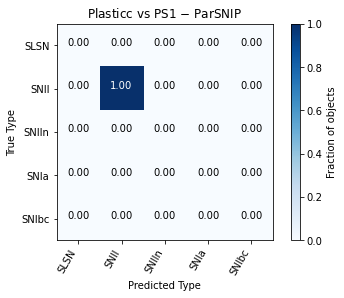

In [74]:
#classifications_ps1_on_ps1_predictions
parsnip.plot_confusion_matrix(plasticc_index_prob_gt_75_both, ps1_classif_prob_gt_75_both,
                              title='Plasticc vs PS1 $-$ ParSNIP')
plt.savefig('DECam_confusion_matrix_Plasticc_Ps1_bothmodels_prob>75.pdf')



In [76]:
plasticc_index_prob_gt_75_both[plasticc_index_prob_gt_75_both['type']=='SNII']

object_id,ra,dec,type,type_prob,redshift,z_spec_exists,hostgal_photoz,hostgal_photoz_err,parsnip_reference_time,parsnip_scale,reference_time,reference_time_error,color,color_error,amplitude,amplitude_error,s1,s1_error,s2,s2_error,s3,s3_error,total_s2n,count,count_s2n_3,count_s2n_5,count_s2n_3_pre,count_s2n_3_rise,count_s2n_3_fall,count_s2n_3_post,model_chisq,model_dof,luminosity,luminosity_error
str23,float64,float64,bytes7,float64,float64,int64,float32,float32,float64,float32,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int64,int64,int64,int64,int64,int64,int64,float32,int64,float64,float32
A202103221409059m023156,212.27475706,-2.53247783,SNII,0.8084251918163796,0.5241751670837402,0,0.52417517,0.16277674,59297.30917632439,1.591225,59304.703880666275,1.4192014,0.16922972,0.041719835,0.018206725,0.00050075626,-1.6406775,0.18364602,2.180085,0.2144688,-0.17572959,0.39899728,37.493214,21,21,20,0,4,17,0,49.719727,15,-13.100077817753721,0.029869553
A202103221453039m024020,223.26664368,-2.67227598,SNII,0.7949114435686239,0.09234914928674698,0,0.09234915,0.015785733,59313.311823843425,3.109528,59298.047608374065,0.80232424,0.02659338,0.013736209,0.04592537,0.00044816287,-1.9298563,0.045765653,0.8450295,0.055974662,1.4110521,0.130704,110.15936,39,39,39,0,4,28,7,326.51764,33,-9.858456655887046,0.010595495
A202104151416348m013431,214.14505528,-1.57542119,SNII,0.826521422452422,0.1203947514295578,1,0.1141827,0.015340866,59333.20949001931,2.2252424,59310.425764280786,2.7460165,0.5861529,0.044338174,0.07653199,0.0032638598,-2.1730545,0.27411005,0.9497999,0.21349178,0.04346171,0.44531983,24.795595,8,8,7,0,0,7,1,31.040852,2,-11.028779662515767,0.046331502
T202103221422063m031255,215.52646083,-3.21554766,SNII,0.8655553670819455,0.09955252707004547,1,0.10922255,0.022122579,59310.318406141196,2.1025333,59291.30947021285,2.668198,0.23558715,0.030179419,0.037595473,0.000786206,-2.6076448,0.19015835,0.48975468,0.14112698,0.16334124,0.26803604,49.677746,35,35,35,0,0,27,8,76.33105,29,-9.814680998118817,0.022708507
T202103221422216m001038,215.59001105,-0.17736063,SNII,0.9160060541284712,0.07389475405216217,1,0.08053181,0.018955687,59297.294446093896,6.9440064,59295.54712889896,0.65020627,0.007493082,0.010271451,0.10731739,0.0005851082,-1.8674802,0.03799099,0.60573345,0.050326753,1.8729166,0.10622843,215.05833,57,57,56,0,3,41,13,530.3077,51,-10.26871069246502,0.005919662
T202104061428448p004246,217.18678082,0.71303996,SNII,0.8680870792460066,0.05680347979068756,1,0.03954407,0.010659233,59319.22203321544,5.6265955,59318.911540699875,0.4503776,0.24730329,0.01349489,0.12254674,0.0007618578,-2.5720708,0.08263575,0.66076195,0.058678582,-1.0998093,0.11254896,179.8697,66,66,66,0,20,46,0,374.65543,60,-9.815757167231851,0.006749983


In [77]:
360 - 0.17736063

359.82263937

In [107]:
keys_ps1 = ['SLSN', 'SNII', 'SNIIn', 'SNIa', 'SNIbc']
for i in classifications_ps1_DECam:
    print(i['object_id'])
    prob = [i[key] for key in keys_ps1]
    classif = keys_ps1[prob.index(max(prob))]
    #classification_dict_ps1[i['object_id']] = {'type':classif, 'prob': max(prob)}
    print('\n      ', keys[prob.index(max(prob))], max(prob),'\n')

A202103221415141m004911

       SNIa 0.6200208865845233 

A202103221415411m034637

       SNIa-91bg 0.3562549354102232 

A202103221415420m010306

       SLSN-I 0.4882811339497885 

A202103221415434p012141

       SLSN-I 0.6854444883576054 

A202103221415581p020343

       SNIa 0.8580977523770453 

A202103221416166p021022

       SLSN-I 0.4502593850245192 

A202103221416444m013014

       SNIa-91bg 0.7057608926007892 

A202103221419493m005423

       SNIa 0.7418961031694673 

A202103221421240m003354

       SNIa 0.8079054174918578 

A202103221422364m011342

       SLSN-I 0.5868748210144751 

A202103221422581m024328

       SLSN-I 0.851347922932981 

A202103221425310m001309

       SNIa 0.8062011156699999 

A202103221425464m000705

       SNIa 0.8270506344697122 

A202103221425535p014857

       SNIa 0.7912469228357228 

A202103221426202m015037

       SLSN-I 0.7331870466093185 

A202103221428463p020055

       SNIa-91bg 0.5358578916382342 

A202103221429185p000158

       SLSN-I 0.59196

In [108]:
for i in predictions_all_copyWithType_PS1:
    print(i['object_id'])
    i['type'] = classification_dict_ps1[i['object_id']]['type']
    i['type_prob'] = classification_dict_ps1[i['object_id']]['prob']

A202103221415141m004911
A202103221415411m034637
A202103221415420m010306
A202103221415434p012141
A202103221415581p020343
A202103221416166p021022
A202103221416444m013014
A202103221419493m005423
A202103221421240m003354
A202103221422364m011342
A202103221422581m024328
A202103221425310m001309
A202103221425464m000705
A202103221425535p014857
A202103221426202m015037
A202103221428463p020055
A202103221429185p000158
A202103221430059m013946
A202103221431564m034803
A202103221432532p005029
A202103221435010m003706
A202103221435424m001446
A202103221435448m004458
A202103221437106m015403
A202103221437253m032002
A202103221437327p002223
A202103221437382p020501
A202103221441336p003659
A202103221442037p000433
A202103221442452m011300
A202103221443116m002550
A202103221444048m004220
A202103221444178m000231
A202103221444205m002735
A202103221446040p001624
A202103221448353m005406
A202103221449262m025648
A202103221449288m002248
A202103221451248m024325
A202103221451552p001452
A202103221452176m023029
A202103221452283

In [109]:
    
predictions_all_copyWithType_PS1

object_id,ra,dec,type,type_prob,redshift,z_spec_exists,hostgal_photoz,hostgal_photoz_err,parsnip_reference_time,parsnip_scale,reference_time,reference_time_error,color,color_error,amplitude,amplitude_error,s1,s1_error,s2,s2_error,s3,s3_error,total_s2n,count,count_s2n_3,count_s2n_5,count_s2n_3_pre,count_s2n_3_rise,count_s2n_3_fall,count_s2n_3_post,model_chisq,model_dof,luminosity,luminosity_error
str23,float64,float64,bytes7,float64,float64,int64,float32,float32,float64,float32,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int64,int64,int64,int64,int64,int64,int64,float32,int64,float64,float32
A202103221415141m004911,213.80889995,-0.8199123,SNIa,0.6200208865845233,0.15020999312400818,1,0.15060534,0.03396368,59296.31750289007,2.2755024,59288.42965594336,7.424918,0.07694232,0.20167057,0.03963307,0.002381432,-0.11812335,0.7275924,0.7485431,0.83224034,-0.12658925,0.7790328,16.7628,2,2,2,0,0,2,0,0.015905185,-4,-10.835563777196015,0.06531727
A202103221415411m034637,213.92157513,-3.77696294,SNIbc,0.3562549354102232,0.425871342420578,0,0.42587134,0.0428628,59297.354215943655,1.4521897,59290.537765824636,1.9267592,-0.14373422,0.04829401,0.007180336,0.0002438502,1.2238778,0.29583287,-0.14898513,0.6919337,0.12301634,0.85152733,30.371681,6,4,4,0,0,4,0,18.474096,0,-11.552398616426402,0.036886677
A202103221415420m010306,213.92520067,-1.0519273,SNII,0.4882811339497885,0.1420629620552063,0,0.14206296,0.040695187,59297.29675428338,1.893637,59286.8868869967,2.2359486,0.15660349,0.037982803,0.032420475,0.00079386326,0.30523834,0.16670603,1.5469568,0.3437706,0.19023518,0.32848653,42.26668,7,7,7,0,0,7,0,15.474737,1,-10.485400831717357,0.026591145
A202103221415434p012141,213.93115462,1.36149709,SNII,0.6854444883576054,0.42231786251068115,0,0.42231786,0.0694895,59297.22304672782,1.6795923,59296.77559698407,1.187646,-0.09535849,0.038612813,0.008178454,0.00023378214,0.5973085,0.23533322,-0.08171609,0.52223426,0.39249426,0.7286506,35.828934,7,7,7,0,2,5,0,8.244191,1,-11.672196322071095,0.031044343
A202103221415581p020343,213.9924595,2.06220075,SNIa,0.8580977523770453,0.7413288354873657,0,0.74132884,0.08130314,59295.266472645315,1.3730491,59306.261415310415,2.008942,-0.30550694,0.051368732,0.0029626521,0.0001332706,-1.2340782,0.21575631,-0.31127828,0.4895096,-0.539326,0.81982774,22.569021,2,2,2,0,2,0,0,0.91151166,-4,-12.040930005647425,0.04887324
A202103221416166p021022,214.06918419,2.17283228,SNII,0.4502593850245192,0.5018662214279175,0,0.5018662,0.15011792,59297.24243707085,4.6115274,59300.669382995606,0.6624078,-0.25812972,0.020051083,0.012854168,0.00014098673,-0.16994357,0.061404467,-1.2673544,0.25226104,0.27045965,0.5709905,101.928665,20,20,19,0,4,16,0,173.93887,14,-12.608925105673123,0.011909026
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
A202104121409174p012921,212.32267593,1.48925993,SNII,0.4922134283588167,0.21081644296646118,0,0.21081644,0.08459667,59328.15747542464,0.9618862,59324.743812991015,1.5334148,0.012621717,0.09386308,0.010870993,0.0005279419,-0.3756334,0.29975814,0.9727447,0.67244977,0.58301103,0.78086406,20.82964,4,4,4,0,2,2,0,3.826637,-2,-10.245007381177622,0.052769512
A202104121410160m031040,212.56683399,-3.17794403,SNII,0.8245422834765501,0.2812003195285797,0,0.28120032,0.041119047,59319.30380031195,3.4678886,59320.117376891045,1.2289459,-0.039578825,0.019246923,0.030934554,0.00042465472,-1.7849106,0.072820894,2.667241,0.09768804,1.1626776,0.23666306,78.647766,14,14,14,0,4,10,0,198.06953,8,-12.088766202994705,0.01490543


In [110]:
predictions_all_copyWithType_PS1.write('120_DECam_predictions_PS1_.hdf5', path='predictions')

In [111]:
b = Table.read('120_DECam_predictions_PS1_.hdf5', path='predictions')
b

object_id,ra,dec,type,type_prob,redshift,z_spec_exists,hostgal_photoz,hostgal_photoz_err,parsnip_reference_time,parsnip_scale,reference_time,reference_time_error,color,color_error,amplitude,amplitude_error,s1,s1_error,s2,s2_error,s3,s3_error,total_s2n,count,count_s2n_3,count_s2n_5,count_s2n_3_pre,count_s2n_3_rise,count_s2n_3_fall,count_s2n_3_post,model_chisq,model_dof,luminosity,luminosity_error
bytes23,float64,float64,bytes7,float64,float64,int64,float32,float32,float64,float32,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int64,int64,int64,int64,int64,int64,int64,float32,int64,float64,float32
A202103221415141m004911,213.80889995,-0.8199123,SNIa,0.6200208865845233,0.15020999312400818,1,0.15060534,0.03396368,59296.31750289007,2.2755024,59288.42965594336,7.424918,0.07694232,0.20167057,0.03963307,0.002381432,-0.11812335,0.7275924,0.7485431,0.83224034,-0.12658925,0.7790328,16.7628,2,2,2,0,0,2,0,0.015905185,-4,-10.835563777196015,0.06531727
A202103221415411m034637,213.92157513,-3.77696294,SNIbc,0.3562549354102232,0.425871342420578,0,0.42587134,0.0428628,59297.354215943655,1.4521897,59290.537765824636,1.9267592,-0.14373422,0.04829401,0.007180336,0.0002438502,1.2238778,0.29583287,-0.14898513,0.6919337,0.12301634,0.85152733,30.371681,6,4,4,0,0,4,0,18.474096,0,-11.552398616426402,0.036886677
A202103221415420m010306,213.92520067,-1.0519273,SNII,0.4882811339497885,0.1420629620552063,0,0.14206296,0.040695187,59297.29675428338,1.893637,59286.8868869967,2.2359486,0.15660349,0.037982803,0.032420475,0.00079386326,0.30523834,0.16670603,1.5469568,0.3437706,0.19023518,0.32848653,42.26668,7,7,7,0,0,7,0,15.474737,1,-10.485400831717357,0.026591145
A202103221415434p012141,213.93115462,1.36149709,SNII,0.6854444883576054,0.42231786251068115,0,0.42231786,0.0694895,59297.22304672782,1.6795923,59296.77559698407,1.187646,-0.09535849,0.038612813,0.008178454,0.00023378214,0.5973085,0.23533322,-0.08171609,0.52223426,0.39249426,0.7286506,35.828934,7,7,7,0,2,5,0,8.244191,1,-11.672196322071095,0.031044343
A202103221415581p020343,213.9924595,2.06220075,SNIa,0.8580977523770453,0.7413288354873657,0,0.74132884,0.08130314,59295.266472645315,1.3730491,59306.261415310415,2.008942,-0.30550694,0.051368732,0.0029626521,0.0001332706,-1.2340782,0.21575631,-0.31127828,0.4895096,-0.539326,0.81982774,22.569021,2,2,2,0,2,0,0,0.91151166,-4,-12.040930005647425,0.04887324
A202103221416166p021022,214.06918419,2.17283228,SNII,0.4502593850245192,0.5018662214279175,0,0.5018662,0.15011792,59297.24243707085,4.6115274,59300.669382995606,0.6624078,-0.25812972,0.020051083,0.012854168,0.00014098673,-0.16994357,0.061404467,-1.2673544,0.25226104,0.27045965,0.5709905,101.928665,20,20,19,0,4,16,0,173.93887,14,-12.608925105673123,0.011909026
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
A202104121409174p012921,212.32267593,1.48925993,SNII,0.4922134283588167,0.21081644296646118,0,0.21081644,0.08459667,59328.15747542464,0.9618862,59324.743812991015,1.5334148,0.012621717,0.09386308,0.010870993,0.0005279419,-0.3756334,0.29975814,0.9727447,0.67244977,0.58301103,0.78086406,20.82964,4,4,4,0,2,2,0,3.826637,-2,-10.245007381177622,0.052769512
A202104121410160m031040,212.56683399,-3.17794403,SNII,0.8245422834765501,0.2812003195285797,0,0.28120032,0.041119047,59319.30380031195,3.4678886,59320.117376891045,1.2289459,-0.039578825,0.019246923,0.030934554,0.00042465472,-1.7849106,0.072820894,2.667241,0.09768804,1.1626776,0.23666306,78.647766,14,14,14,0,4,10,0,198.06953,8,-12.088766202994705,0.01490543


In [140]:
stats_plasticc = {'Model':'plasticc', 'KN':0, 'SLSN-I':0, 'SNII':0, 'SNIa':0, 'SNIa-91':0, 'SNIax':0, 'SNIbc':0, 'TDE':0, 'z_spec_exists':0}
# 'KN', 'SLSN-I', 'SNII', 'SNIa', 'SNIa-91bg', 'SNIax', 'SNIbc', 'TDE'

In [136]:
for i in range(len(a)):
    stats_plasticc[a['type'][i]] += 1
    stats_plasticc['z_spec_exists'] += a['z_spec_exists'][i]

In [137]:
stats_plasticc

{'Model': 'plasticc',
 'KN': 32,
 'SLSN-I': 0,
 'SNII': 22,
 'SNIa': 3,
 'SNIa-91': 5,
 'SNIax': 24,
 'SNIbc': 0,
 'TDE': 34,
 'z_spec_exists': 30}

In [141]:

for i in range(0,len(predictions_all_copyWithType)):
    stats_plasticc[predictions_all_copyWithType['type'][i]] += 1
    stats_plasticc['z_spec_exists'] += predictions_all_copyWithType['z_spec_exists'][i]

In [142]:
stats_plasticc


{'Model': 'plasticc',
 'KN': 32,
 'SLSN-I': 0,
 'SNII': 22,
 'SNIa': 3,
 'SNIa-91': 5,
 'SNIax': 24,
 'SNIbc': 0,
 'TDE': 34,
 'z_spec_exists': 30}

In [149]:
for i in stats_plasticc:
    print(stats_plasticc[i])
    
row1 = [[stats_plasticc[i]] for i in stats_plasticc]
stats_table = Table(row1, names=('Model', 'KN', 'SLSN-I', 'SNII', 'SNIa', 'SNIa-91bg', 'SNIax', 'SNIbc', 'TDE', 'z_spec_exists'), meta={})

plasticc
32
0
22
3
5
24
0
34
30


In [150]:
stats_table

Model,KN,SLSN-I,SNII,SNIa,SNIa-91bg,SNIax,SNIbc,TDE,z_spec_exists
str8,int64,int64,int64,int64,int64,int64,int64,int64,int64
plasticc,32,0,22,3,5,24,0,34,30


In [160]:
type_stats_plasticc = {'Type': ['KN', 'SLSN-I', 'SNII', 'SNIa', 'SNIa-91bg', 'SNIax', 'SNIbc', 'TDE'], 'Prob > 0.8':[], 'Highest Prob':[], 'Lowest Prob':[], 'Average Prob':[] }

In [ ]:
for i in range(0,len(predictions_all_copyWithType)):
    index = type_stats_plasticc['Type'].index([predictions_all_copyWithType['type'][i]])
    type_stats_plasticc[''] += predictions_all_copyWithType['z_spec_exists'][i]

In [93]:
prob_list_plasticc = {'KN':[], 
                       'SLSN-I':[], 
                       'SNII':[], 
                       'SNIa':[], 
                       'SNIa-91':[], 
                       'SNIax':[], 
                       'SNIbc':[], 
                       'TDE':[] 
                        }


In [117]:
has_z_spec = {'KN':0, 
                       'SLSN-I':0, 
                       'SNII':0, 
                       'SNIa':0, 
                       'SNIa-91':0, 
                       'SNIax':0, 
                       'SNIbc':0, 
                       'TDE':0 
                        }



In [118]:
for i in range(0,len(a)):
    prob_list_plasticc[a['type'][i]].append(a['type_prob'][i])
    has_z_spec[a['type'][i]] += a['z_spec_exists'][i]
    
tot_z = sum([has_z_spec[i] for i in has_z_spec.keys()])

In [119]:
has_z_spec


{'KN': 56,
 'SLSN-I': 0,
 'SNII': 18,
 'SNIa': 2,
 'SNIa-91': 12,
 'SNIax': 34,
 'SNIbc': 1,
 'TDE': 8}

In [123]:
row1 = [['PLAsTiCC']]+[[has_z_spec[i]] for i in has_z_spec.keys()] + [[tot_z]]
stats_table = Table(row1, names=('Model', 'KN', 'SLSN-I', 'SNII', 'SNIa', 'SNIa-91bg', 'SNIax', 'SNIbc', 'TDE', 'Total Spec-Redshift'), meta={})

In [120]:
tot_z

131

In [124]:
stats_table

Model,KN,SLSN-I,SNII,SNIa,SNIa-91bg,SNIax,SNIbc,TDE,Total Spec-Redshift
str8,int64,int64,int64,int64,int64,int64,int64,int64,int64
PLAsTiCC,56,0,18,2,12,34,1,8,131


In [125]:
asc.write(stats_table, format='latex')

\begin{table}
\begin{tabular}{cccccccccc}
Model & KN & SLSN-I & SNII & SNIa & SNIa-91bg & SNIax & SNIbc & TDE & Total Spec-Redshift \\
PLAsTiCC & 56 & 0 & 18 & 2 & 12 & 34 & 1 & 8 & 131 \\
\end{tabular}
\end{table}


In [96]:
prob_list_plasticc

{'KN': [0.7886832807821794,
  0.5290928888257769,
  0.5114594066635206,
  0.441434637047181,
  0.7559157160959191,
  0.81848157668888,
  0.5595376617206693,
  0.46017487345334374,
  0.43942998173354375,
  0.5314658864931163,
  0.4767327933393898,
  0.9011675490850326,
  0.7877484483031603,
  0.867328576719469,
  0.5631660130860435,
  0.8174844207903977,
  0.8432360165127577,
  0.5262374931267015,
  0.8122096778985151,
  0.6628996606682861,
  0.829319822849663,
  0.7002097954847025,
  0.6684340994961524,
  0.5749293073098822,
  0.34827387641628027,
  0.45725755374316845,
  0.3145740810106247,
  0.34357703572187115,
  0.34660639151271544,
  0.784489176694614,
  0.8592101461810318,
  0.4412005615403046,
  0.7732685034906717,
  0.5899184047629571,
  0.6806756094489638,
  0.8181101974853291,
  0.7140567206465566,
  0.82502672196868,
  0.7936142994902053,
  0.7965845014703884,
  0.7563069822823517,
  0.6775518527930608,
  0.793527296445507,
  0.6924816446637049,
  0.8355439846107029,
  0.435

In [101]:
names = ('Type','Total','Prob > 0.8', 'Highest Prob', 'Lowest Prob', 'Mean Prob', 'Median Prob')

rows = []
for i in prob_list_plasticc.keys():
    prob_list = prob_list_plasticc[i]
    if len(prob_list)>0:
        tot = [len(prob_list)]
        gt8 = [len([j for j in prob_list if j>=0.8])]
        hp = [max(prob_list)]
        lp = [min(prob_list)]
        ap = [np.round(sum(prob_list)/len(prob_list), 5)]
        md = [np.round(statistics.median(prob_list), 5)]
        row = [[i], tot, gt8, hp, lp, ap, md]
        rows.append(row)


In [204]:
names = ('Type','Total','Prob > 0.8', 'Highest Prob', 'Lowest Prob', 'Mean Prob', 'Median Prob')

rows2 = []
for i in prob_list_plasticc.keys():
    prob_list = prob_list_plasticc[i]
    if len(prob_list)>0:
        tot = len(prob_list)
        gt8 = len([j for j in prob_list if j>=0.8])
        hp = max(prob_list)
        lp = min(prob_list)
        ap = np.round(sum(prob_list)/len(prob_list), 5)
        row = [i, tot, gt8, hp, lp, ap]
        rows2.append(row)



In [271]:
stats_table = Table(list(np.transpose(rows2)), names=names, meta={})

In [218]:
stats_table

Type,Total,Prob > 0.8,Highest Prob,Lowest Prob,Mean Prob
str32,str32,str32,str32,str32,str32
KN,32,8,0.9011675490850326,0.3145740810106247,0.617079800928231
SNII,22,2,0.8504300490079103,0.34963133272445857,0.6135279609372458
SNIa,3,0,0.48957647875147153,0.38505729204252714,0.4202816955137538
SNIa-91,5,0,0.7287976810415124,0.33841697540326227,0.5084445827839497
SNIax,24,4,0.9098880930663549,0.27330028017387076,0.6372077623843134
TDE,34,22,0.9952970995575539,0.277406278952214,0.7880761323769248


In [102]:
stats_table = Table(rows[0], names=names, meta={'Model': 'plasticc', 'Classifier': 'plasticc'})

for row in rows[1:]:
    stats_table.add_row(row)

In [103]:
stats_table

Type,Total,Prob > 0.8,Highest Prob,Lowest Prob,Mean Prob,Median Prob
str7,int64,int64,float64,float64,float64,float64
KN,185,33,0.9253689041948416,0.2457645678700006,0.63697,0.67311
SLSN-I,1,0,0.6629126845570102,0.6629126845570102,0.66291,0.66291
SNII,55,8,0.9160060541284712,0.219145240930382,0.55913,0.53702
SNIa,6,0,0.7170144978528129,0.2771415089752137,0.49023,0.43789
SNIa-91,32,1,0.9376385805052783,0.2333976228181635,0.48261,0.44888
SNIax,115,21,0.971079328708256,0.24228422573268954,0.60312,0.60261
SNIbc,1,0,0.3777072924512085,0.3777072924512085,0.37771,0.37771
TDE,159,63,0.9952970995575539,0.23691700733537596,0.70385,0.73682


In [100]:
stats_table.meta

{'Model': 'plasticc', 'Classifier': 'plasticc'}

In [107]:
asc.write(stats_table, format='latex')

\begin{table}
\begin{tabular}{ccccccc}
Type & Total & Prob > 0.8 & Highest Prob & Lowest Prob & Mean Prob & Median Prob \\
KN & 185 & 33 & 0.9253689041948416 & 0.2457645678700006 & 0.63697 & 0.67311 \\
SLSN-I & 1 & 0 & 0.6629126845570102 & 0.6629126845570102 & 0.66291 & 0.66291 \\
SNII & 55 & 8 & 0.9160060541284712 & 0.219145240930382 & 0.55913 & 0.53702 \\
SNIa & 6 & 0 & 0.7170144978528129 & 0.2771415089752137 & 0.49023 & 0.43789 \\
SNIa-91 & 32 & 1 & 0.9376385805052783 & 0.2333976228181635 & 0.48261 & 0.44888 \\
SNIax & 115 & 21 & 0.971079328708256 & 0.24228422573268954 & 0.60312 & 0.60261 \\
SNIbc & 1 & 0 & 0.3777072924512085 & 0.3777072924512085 & 0.37771 & 0.37771 \\
TDE & 159 & 63 & 0.9952970995575539 & 0.23691700733537596 & 0.70385 & 0.73682 \\
\end{tabular}
\end{table}
